####**Tests d'hypothèses en Python**
+ *4 heures*
+ *15 vidéos*
+ *50 exercices*
+ *10 674 participants*
+ *3 750 XP*

####**Description du cours**
+ Les tests d'hypothèse vous permettent de répondre à des questions sur vos ensembles de données d'une manière statistiquement rigoureuse. 

+ Dans ce cours, vous développerez vos compétences analytiques en Python en apprenant comment et quand utiliser des tests courants comme les tests t, les tests de proportion et les tests de chi carré. 

+ En travaillant avec des données du monde réel, y compris les commentaires des utilisateurs de Stack Overflow et les données de la chaîne d'approvisionnement pour les expéditions de fournitures médicales, vous acquerrez une compréhension approfondie de la façon dont ces tests fonctionnent et des hypothèses clés qui les sous-tendent. 

+ Vous découvrirez également comment les tests non paramétriques peuvent être utilisés pour dépasser les limites des tests d'hypothèse traditionnels.

####**1) Introduction aux tests d'hypothèse**

+ ***Comment fonctionnent les tests d'hypothèse et quels problèmes peuvent-ils résoudre ?*** 

+ Pour le savoir, vous allez parcourir le flux de travail d'un test de proportion à un échantillon. 

+ Ce faisant, vous rencontrerez des concepts importants tels que ***les scores z, les valeurs p et les erreurs de faux négatifs et de faux positifs.***

|OBJECTIFS|
|---------|
Tests d'hypothèse et valeurs z
Utilisations des tests A/B
Calcul de la moyenne de l'échantillon
Calcul d'un score z
Valeurs p
Essais criminels et tests d'hypothèse
Queue gauche, queue droite, deux queues
Calcul des valeurs p
Signification statistique
Décisions à partir des valeurs p
Calcul d'un intervalle de confiance
Erreurs de type I et de type II

####**2) Tests à deux échantillons et ANOVA**

+ Dans ce chapitre, vous apprendrez à tester les différences de moyennes entre deux groupes à l'aide de tests t et à étendre ces tests à plus de deux groupes à l'aide de tests ANOVA et de tests t par paire.

|OBJECTIFS|
|---------|
Réalisation de tests t
Flux de travail des tests d'hypothèse
Statistique du test de la moyenne à deux échantillons
Calcul des valeurs p à partir des statistiques t
Pourquoi le test t est-il nécessaire ?
La distribution t
De t à p
Tests t appariés
L'appariement est-il nécessaire ?
Visualisation de la différence
Utilisation de ttest()
Tests ANOVA
Visualisation de nombreuses catégories
Réalisation d'un test ANOVA
Tests t par paire

####**3) Tests de proportion**
+ Il est maintenant temps de tester les différences de proportions entre deux groupes à l'aide de tests de proportion. 

+ Grâce à des exercices pratiques, vous étendrez vos tests de proportion à plus de deux groupes avec des tests d'indépendance du chi-deux, et vous reviendrez au cas d'un échantillon avec des tests d'ajustement du chi-deux.

|OBJECTIFS|
|---------|
Tests de proportion à un échantillon
t pour les proportions ?
Test pour les proportions simples
Tests de proportion à deux échantillons
Test de deux proportions
proportions_ztest() pour deux échantillons
Test d'indépendance du khi-deux
La distribution du chi-deux
Combien de queues pour les tests du chi-deux ?
Exécution d'un test du chi-deux
Tests d'ajustement du chi-deux
Visualisation de la qualité de l'ajustement
Réalisation d'un test d'adéquation

####**4) Tests non paramétriques**
+ Enfin, il est temps d'en savoir plus sur les hypothèses formulées par les tests d'hypothèse paramétriques et de voir comment les tests non paramétriques peuvent être utilisés lorsque ces hypothèses ne sont pas satisfaites.

|OBJECTIFS|
|---------|
Hypothèses des tests d'hypothèse
Hypothèses courantes des tests d'hypothèse
Test de la taille de l'échantillon
Tests non paramétriques
Quel test paramétrique ?
Test de Wilcoxon signé-rank
ANOVA non paramétrique et tests t non appariés
Test de Wilcoxon-Mann-Whitney
Kruskal-Wallis


+ https://www.statsmodels.org/devel/examples/notebooks/generated/wls.html

In [82]:
# Import pandas
import pandas as pd

# Import the course datasets 
republican_votes = pd.read_feather('/content/repub_votes_potus_08_12.feather')
dem_votes_potus_12_16 = pd.read_feather('/content/dem_votes_potus_12_16.feather')
late_shipments = pd.read_feather('/content/late_shipments.feather')
stackoverflow = pd.read_feather("/content/stack_overflow.feather")

In [3]:
republican_votes.head()

,state,county,repub_percent_08,repub_percent_12
0,Alabama,Hale,38.957877,37.139882
1,Arkansas,Nevada,56.726272,58.983452
2,California,Lake,38.896719,39.331367
3,California,Ventura,42.923190,45.250693
4,Colorado,Lincoln,74.522569,73.764757


###**Tests d'hypothèse et scores $z$**

#####**1. Tests d'hypothèse et scores $z$**
+ Bonjour, je m'appelle James. 

+ Bienvenue dans ce cours sur les tests d'hypothèse en Python. 

+ Pour commencer, examinons un exemple concret où un test d'hypothèse a été crucial dans un processus décisionnel.

####**2. Le test A/B**
+ En 2013, Electronic Arts, ou EA, a lancé un jeu vidéo appelé SimCity 5. 

+ En amont de sa sortie, ils voulaient augmenter les ventes de précommande. 

+ **Ils ont utilisé une technique de conception expérimentale appelée test A/B, qui trouve ses racines dans les tests d'hypothèse, pour tester différents scénarios publicitaires et voir lequel améliorait le plus les ventes**. 

+ Les visiteurs du site Web ont été répartis en un groupe de contrôle et un groupe de traitement. Chaque groupe a vu une version différente de la page de vente de précommande du jeu.

  + Crédit image : "Electronic Arts" par majaX1 CC BY-NC-SA 2.0


####**3. Test A/B de la page Web de vente au détail**

+ Voici chaque version de la page de précommande de SimCity 5. 

+ Le groupe de contrôle a vu la version avec une bannière annonçant une remise sur leur prochain achat pour chaque précommande. 

+ Le groupe de traitement a vu la version sans la bannière. 

+ EA a comparé le pourcentage d'achats pour les deux groupes afin de déterminer lequel était le plus performant. 

+ Notre hypothèse naïve serait que la publicité a augmenté les ventes de précommandes.

#####**4. Résultats du test A/B**

+ Les résultats du test A/B ont été surprenants. 

+ La page de traitement sans publicité a donné lieu à des ventes 43 % plus élevées que la page de contrôle avec la publicité. 

+ L'expérience a prouvé que notre intuition selon laquelle un plus grand nombre de publicités à prix réduit entraînerait une augmentation des ventes était fausse. 

+ Nous pouvons nous demander si la différence de 43 % était significative entre les groupes de contrôle et de traitement ou s'il s'agissait d'un simple hasard. 

+ Pour obtenir cette réponse, nous aurions besoin de l'ensemble de données original de l'EA, qui n'est pas accessible au public. 

+ Cependant, la méthode permettant de répondre à cette question de signification ferait appel à des techniques issues à la fois du cours Sampling in Python et de ce cours.

####**5. Enquête 2020 sur les développeurs de Stack Overflow**

+ Chaque année, Stack Overflow interroge ses utilisateurs, qui sont principalement des développeurs de logiciels, sur eux-mêmes, la façon dont ils utilisent Stack Overflow, leur travail et les outils de développement qu'ils utilisent. 

+ Dans ce cours, nous allons examiner un sous-ensemble de réponses à l'enquête provenant d'utilisateurs qui se sont identifiés comme des scientifiques de données.

####**6. Hypothèse sur la moyenne**

+ Faisons l'hypothèse que la rémunération annuelle moyenne de la population des scientifiques des données est de 110 000 dollars. 

+ Nous pouvons d'abord examiner la rémunération annuelle moyenne à partir des données de l'enquête par sondage. 

+ La rémunération annuelle, convertie en dollars, est stockée dans la colonne convert_comp. 

+ La moyenne de l'échantillon est un type d'estimation ponctuelle, qui est un autre nom pour une statistique sommaire. 

+ Nous pouvons la calculer avec pandas en utilisant la méthode dot-mean sur la série converted_comp. 

+ Le résultat est différent de notre hypothèse, mais est-il significativement différent ?




####**7. Générer une distribution bootstrap**
+ Pour répondre à cette question, **nous devons générer une distribution bootstrap des moyennes d'échantillons.** 

+ Pour ce faire, **il faut rééchantillonner l'ensemble de données, calculer la moyenne de l'échantillon pour ce rééchantillon, puis répéter ces étapes pour créer une liste de moyennes d'échantillons.**

  + Les distributions bootstrap sont enseignées au chapitre 4 de Sampling in Python

####**8. Visualisation de la distribution bootstrap**

+ Voici un histogramme de la distribution bootstrap. 

+ Sa forme de cloche signifie qu'elle est à peu près normalement distribuée. Remarquez que 110 000 se trouve à gauche de la distribution.

####**9. Erreur standard**

+ Rappelez-vous que l'écart-type des statistiques de l'échantillon dans la distribution bootstrap estime l'erreur standard de la statistique.

####**10. Scores z**

+ Les variables ayant des unités et des plages arbitraires, nous devons normaliser les valeurs avant de tester notre hypothèse. 

+ Une façon courante de normaliser les valeurs consiste à soustraire la moyenne et à la diviser par l'écart-type. 

+ Pour le test d'hypothèse, nous utilisons une variante où nous prenons la statistique de l'échantillon, soustrayons la valeur du paramètre supposé et divisons par l'erreur standard. Le résultat s'appelle un score z.

####**11. Scores z**
+ Voici les valeurs que nous avons calculées précédemment. 

+ La rémunération annuelle moyenne de l'échantillon pour les scientifiques des données, qui est d'environ 120 000 dollars, moins la rémunération hypothétique de 110 000 dollars, divisée par l'erreur standard, donne un score z de un virgule sept zéro sept.

####**12. Tester l'hypothèse**
+ Est-ce un grand ou un petit nombre ? Déterminer cela est l'objectif de ce cours.

####**13. Tester l'hypothèse**

+ En particulier, nous pouvons maintenant énoncer l'une des utilisations du test d'hypothèse : 
  + déterminer si une statistique d'échantillon est proche ou éloignée d'une valeur attendue.

####**14. Distribution normale standard (z)**
+ Une dernière chose. 

+ Voici un tracé de la fonction de densité de probabilité pour la distribution normale standard, qui est une distribution normale avec une moyenne de zéro et un écart-type de un. 

+ On l'appelle souvent la distribution z, et les scores z sont liés à cette distribution. Nous rencontrerons la distribution z tout au long de ce cours.

####**15. Entraînons-nous !**
+ Il est temps de commencer !

###**EXERCICE**

####**Utilisations des tests A/B**


+ Dans la vidéo, vous avez vu comment Electronic Arts a utilisé les tests A / B sur leur site Web lors du lancement de SimCity 5. 

+ Une version de la page montrait une publicité pour un rabais, et une version ne l’a pas fait. 

+ La moitié des utilisateurs ont vu une version de la page et l’autre moitié a vu la deuxième version de la page.

*Quelle est la principale raison d’utiliser un test A / B?*

####**Réponds à la question**

####**Réponses possibles**

+ 1) Il permet aux utilisateurs de voter sur leur page Web préférée.

+ 2) Il vous permet de n’accorder des réductions qu’à la moitié de vos utilisateurs.

+ 3) Il s’agit d’une méthode utilisée pour déterminer directement la taille de l’échantillon nécessaire à votre analyse.

+ ***4) Il fournit un moyen de vérifier les résultats de scénarios concurrents et de décider de la voie à suivre.***

+ 5) Il réduit le nombre d’erreurs dans la production.

####**Calcul de la moyenne de l'échantillon**

+ L'ensemble de données late_shipments contient des données sur la chaîne logistique concernant la livraison de fournitures médicales. 
+ Chaque ligne représente une livraison d'une pièce. La colonne late indique si la pièce a été livrée en retard ou non. 

+ Une valeur de "Oui" signifie que la pièce a été livrée en retard, et une valeur de "Non" signifie que la pièce a été livrée à temps.

Vous commencerez votre analyse en calculant une estimation ponctuelle (ou statistique d'échantillon), à savoir la proportion d'envois en retard.

*Dans pandas, la proportion d'une valeur dans une colonne catégorielle de DataFrame peut être rapidement calculée à l'aide de la syntaxe :*

      prop = (df['col'] == val).mean()

*late_shipments est disponible, et pandas est chargé en tant que pd.*

####**Instructions**
+ Imprimer le jeu de données late_shipments.
+ Calculez la proportion d'envois tardifs dans l'échantillon, c'est-à-dire la moyenne des cas où la colonne des retards est "Oui".

In [5]:
# Print the late_shipments dataset
print(late_shipments)

          id       country managed_by  fulfill_via vendor_inco_term  \
0    36203.0       Nigeria   PMO - US  Direct Drop              EXW   
1    30998.0      Botswana   PMO - US  Direct Drop              EXW   
2    69871.0       Vietnam   PMO - US  Direct Drop              EXW   
3    17648.0  South Africa   PMO - US  Direct Drop              DDP   
4     5647.0        Uganda   PMO - US  Direct Drop              EXW   
..       ...           ...        ...          ...              ...   
995  13608.0        Uganda   PMO - US  Direct Drop              DDP   
996  80394.0    Congo, DRC   PMO - US  Direct Drop              EXW   
997  61675.0        Zambia   PMO - US  Direct Drop              EXW   
998  39182.0  South Africa   PMO - US  Direct Drop              DDP   
999   5645.0      Botswana   PMO - US  Direct Drop              EXW   

    shipment_mode  late_delivery late product_group    sub_classification  \
0             Air            1.0  Yes          HRDT              HIV t

In [6]:
# Calculate the proportion of late shipments
late_prop_samp = (late_shipments["late"] == "Yes").mean()

# Print the results
print(late_prop_samp)

0.061


####**Calculer un z-score**

+ Comme les variables ont des plages et des unités arbitraires, nous devons les normaliser. 

+ Par exemple, un test d'hypothèse qui donnerait des réponses différentes si les variables étaient exprimées en euros plutôt qu'en dollars américains aurait peu de valeur. 

+ La normalisation permet d'éviter cela.

+ **Une valeur normalisée intéressante dans un test d'hypothèse s'appelle un score $Z$**. 

+ Pour le calculer, vous avez besoin de trois nombres. 

+ Pour le calculer, vous avez besoin de trois nombres : 
  + la statistique de l'échantillon (estimation ponctuelle), 
  + la statistique hypothétique et l'erreur standard de la statistique (estimée à partir de la distribution bootstrap).

*La statistique d'échantillon est disponible sous le nom de late_prop_samp.*

*late_shipments_boot_distn est une distribution bootstrap de la proportion d'expéditions tardives, disponible sous forme de liste.*

*pandas et numpy sont chargés avec leurs alias habituels.*

####**Instructions**

+ Faites l'hypothèse que la proportion de livraisons tardives est de 6 %.
+ Calculez l'erreur standard à partir de l'écart type de la distribution bootstrap.
+ Calculez le z-score.

In [9]:
# Generating a bootstrap distribution
import numpy as np
# Step 3. Repeat steps 1 & 2 many times, appending to a list
late_shipments_boot_distn = []
for i in range(5000):
  late_shipments_boot_distn.append(
      # Step 2. Calculate point estimate
      np.mean(
          # Step 1. Resample
          (late_shipments["late"] == "Yes").sample(frac=1, replace=True)
          )
      )

In [10]:
# Hypothesize that the proportion is 6%
late_prop_hyp = 0.06

# Calculate the standard error
std_error = np.std(late_shipments_boot_distn)

# Find z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error

# Print z_score
print(z_score)

0.13244410941353543


###**Valeurs de p**

####**1. Valeurs de p**

+ Les tests d’hypothèse sont comme les procès criminels.

####**2. Procès pénaux**

+ Il y a deux états vrais possibles : 
  + soit l’accusé a commis le crime, 
  + soit il ne l’a pas fait. 
  
+ Il y a aussi deux issues possibles :
  + un verdict de culpabilité 
  + ou de non-culpabilité. 
  
+ L’hypothèse initiale est que le défendeur n’est pas coupable, et l’équipe de poursuite doit présenter des preuves hors de tout doute raisonnable que l’accusé a commis le crime pour qu’un verdict de culpabilité soit rendu.

####**3. Âge de la première expérience en programmation**

+ Revenons à l’enquête Stack Overflow. 

+ La variable age_first_code_cut classe quand l’utilisateur a commencé à programmer. 

+ S’ils avaient 14 ans ou plus, ils sont classés comme adultes; sinon, enfant. 

+ Supposons que des recherches antérieures suggèrent que 35% des développeurs de logiciels ont programmé dans leur enfance. 

+ Cela soulève une question à laquelle il est possible de répondre avec notre ensemble de données. 

+ Notre échantillon fournit-il des preuves qu’une plus grande proportion de scientifiques des données ont commencé à programmer dans leur enfance ?

####**4. Définitions**

+ Précisons quelques définitions. 

+ **Une hypothèse est une déclaration sur un paramètre de population.** 

+ **Nous ne connaissons pas la valeur réelle de ce paramètre de population ; Nous ne pouvons en tirer des conclusions qu’à partir des données.** 

+ **Les tests d’hypothèse comparent deux hypothèses concurrentes**. 

+ **Ces deux hypothèses sont l’hypothèse nulle, représentant l’idée existante, et l’hypothèse alternative, représentant une idée nouvelle qui remet en question l’idée existante**. 

+ Ils sont notés  $H_{Naught}$ (ou $H_0$) et $H_A$, respectivement. 

+ Ici, l’hypothèse nulle est que la proportion de scientifiques des données qui ont commencé à programmer dans leur enfance suit la recherche sur les développeurs de logiciels, à 35%. 

+ L’hypothèse alternative est que le pourcentage est supérieur à 35.

  + 1 « Naught » est l’anglais britannique pour « zéro ». Pour des raisons historiques, « H-nught » est la convention internationale pour prononcer l’hypothèse nulle.


####**5. Procès criminels vs tests d’hypothèses**

+ Pour revenir à notre comparaison des procès criminels, l’accusé peut être coupable ou non coupable, et de même, une seule des hypothèses peut être vraie. 

+ Initialement, le défendeur est présumé non coupable et, de même, nous supposons initialement que l’hypothèse nulle est vraie. 

+ Cela ne change que si l’échantillon fournit suffisamment de preuves pour le rejeter. 

+ Plutôt que de dire que nous acceptons l’hypothèse alternative, il est conventionnel de se référer au rejet de l’hypothèse nulle, ou à ne pas rejeter l’hypothèse nulle. 

+ Si la preuve est « hors de tout doute raisonnable » que l’accusé a commis le crime, alors un verdict « coupable » est rendu. 

+ L’équivalent de test d’hypothèse de « hors de tout doute raisonnable » est connu sous le nom de niveau de signification - plus de détails à ce sujet plus loin dans le chapitre.

####**6. Essais unilatéraux et bilatéraux.**

+ Les queues d’une distribution sont les bords gauche et droit de son PDF. 

+ ***Les tests d’hypothèse déterminent si les statistiques de l’échantillon se trouvent dans les queues de la distribution nulle, qui est la distribution de la statistique si l’hypothèse nulle était vraie.*** 

+ Il existe trois types de tests, et **la formulation de l’hypothèse alternative détermine le type que nous devrions utiliser**. 

+ Si nous vérifions une différence par rapport à une valeur hypothétique, nous recherchons des valeurs extrêmes dans l’une ou l’autre queue et effectuons un test bilatéral. 

+ Si l’hypothèse alternative utilise un langage comme « moins » ou « moins », nous effectuons un test à gauche. 

+ Des mots comme « plus grand » ou « dépasse » correspondent à un test de queue droite. 

+ Pour le test d’hypothèse Stack Overflow, nous avons besoin d’un test à droite car nous recherchons des valeurs extrêmes dans la queue droite.

####**7. Valeurs de $p$**
+ ***Les valeurs $p$ mesurent la force de support de l’hypothèse nulle, ou en d’autres termes, elles mesurent la probabilité d’obtenir un résultat, en supposant que l’hypothèse nulle est vraie.*** 

+ ***Des valeurs $p$ élevées signifient que notre statistique produit un résultat qui n’est probablement pas dans une queue de notre distribution nulle, et le hasard pourrait être une bonne explication du résultat.*** 

+ ***De petites valeurs $p$ signifient que notre statistique produit un résultat probable dans la queue de notre distribution nulle.*** 

+ ***Parce que les valeurs $p$ sont des probabilités, elles sont toujours comprises entre 0 et 1.***

####**8. Calcul du z-score**

+ **Pour calculer la valeur $p$**, nous devons d’abord calculer **le z-score**. 

+ Nous calculons la statistique de l’échantillon, dans ce cas la proportion de scientifiques de données qui ont commencé à programmer dans leur enfance. 

+ La valeur hypothétique de l’hypothèse nulle est de 35%. 

+ Nous obtenons l’erreur type à partir de l’écart-type de la distribution bootstrap, et le score z est la différence entre les proportions, divisée par l’erreur type.

####**9. Calcul de la valeur de $p$**

+ Nous passons **le score $z$ au CDF normal standard, norm.cdf**, à partir de **scipy.stats** avec les valeurs par défaut de 0 moyen et l’écart-type de 1. 

+ Comme nous effectuons un test de queue droite, pas un test de queue gauche, la valeur de $p$ est calculée en prenant 1- norm.cdf. 

+ La valeur de $p$ est de trois sur 100 000.

####**10. Entraînons-nous!**
+ Allez calculer des valeurs $p$!

###**EXERCICE**

####**Procès criminels et tests d’hypothèses**

+ Dans la partie ci-dessus, vous avez vu comment les tests d’hypothèses suivent un processus similaire aux procès criminels.

*Lequel des éléments suivants correspond correctement à un procès criminel avec les propriétés d’un test d’hypothèse?*

####**Réponds à la question**

####**Réponses possibles**

+ 1) Tout comme pour les procès criminels, il y a plus de deux résultats possibles à la conclusion d’un test d’hypothèse.


+ ***2) Tout comme l’accusé est initialement présumé non coupable, l’hypothèse nulle est d’abord supposée vraie.***

+ 3) Le défendeur peut être à la fois coupable et non coupable du crime reproché, et les hypothèses nulles et alternatives peuvent être choisies à la fin du test.

+ 4) Tout comme un tribunal peut refuser de rendre un verdict, il n’est possible que ni l’hypothèse nulle ni l’hypothèse alternative ne soient choisies à la fin du test.

+ 5) Tout comme l’accusé est initialement présumé coupable, l’hypothèse alternative est d’abord supposée vraie.

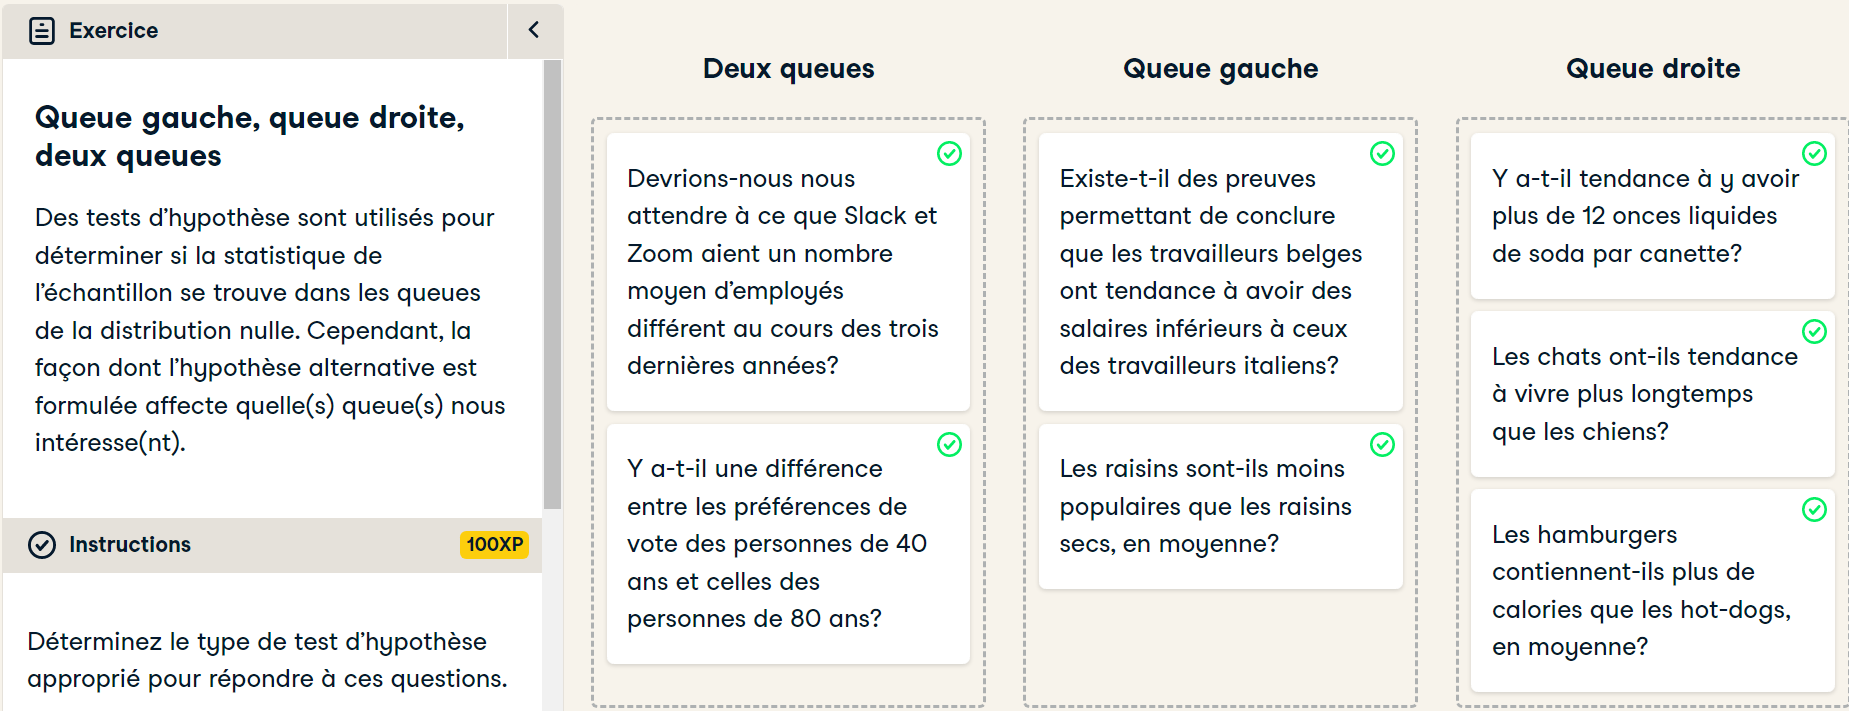

####**Calcul des valeurs $p$**

+ Afin de déterminer s'il faut choisir l'hypothèse nulle ou l'hypothèse alternative, vous devez calculer une valeur p à partir du score $z$.

+ Vous allez maintenant revenir à l'ensemble de données sur les envois tardifs et à la proportion d'envois tardifs.

+ L'hypothèse nulle,$H_0$ , est que la proportion d'expéditions tardives est de 6 %.

L'hypothèse alternative,$H_A$ , est que la proportion d'expéditions tardives est supérieure à 6 %.

*La statistique d'échantillon observée, late_prop_samp, la valeur hypothétique, late_prop_hyp (6%), et l'erreur standard bootstrap, std_error sont disponibles. norm from scipy.stats a également été chargé sans alias.*

####**Instructions**

1) 

####**Question**
+ Quel type de test doit-on utiliser pour cette hypothèse alternative ?

####**Réponses possibles**

+ Test bilatéral

+ unilatéral gauche

+ ***unilatéral droite***

+ Peu importe, n'importe lequel fera l'affaire.

+ Un test d'hypothèse n'est pas approprié pour répondre à cette question.

2) 

+ Calculez le **z-score** de late_prop_samp.
+ Calculez la valeur $p$ pour le **z-score**, en utilisant un test à queue droite.

In [11]:
from scipy.stats import norm

# Calculate the z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp)/std_error

# Calculate the p-value
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)
                 
# Print the p-value
print(p_value) 

0.44731651384193705


###**Signification statistique**

####**1. Signification statistique**
+ *La dernière fois, nous avons introduit les valeurs $p$.*

####**2. Récapitulatif de la valeur de $p$**

+ **Les valeurs $p$ quantifient la quantité de preuves de l’hypothèse nulle**. 

+ ***Des valeurs $p$ élevées indiquent un manque de preuves pour l’hypothèse alternative, s’en tenant plutôt à l’hypothèse nulle supposée.*** 

+ ***Les petites valeurs $p$ nous font douter de cette hypothèse originale en faveur de l’hypothèse alternative.*** 

+ ***Qu’est-ce qui définit le seuil entre une petite valeur de $p$ et une grande valeur ?***

####**3. Niveau de signification**


+ ***Le seuil est connu sous le nom de niveau de signification et est noté alpha, $α$***. 

+ Le niveau de signification approprié dépend de l’ensemble de données et de la discipline travaillée. 

+ ***5% est le choix le plus courant, mais 10% et 1% sont également populaires.*** 

+ ***Le niveau de signification nous donne un processus de décision pour lequel l’hypothèse à appuyer.*** 

+ ***Si la valeur de $p$ est inférieure ou égale à alpha, nous rejetons l’hypothèse nulle. Sinon, nous ne le rejetons pas.*** 

+ Il est important que nous décidions quel devrait être le niveau de signification approprié avant d’exécuter notre test. 

+ Sinon, il y a une tentation de décider d’un niveau de signification qui nous permet de choisir l’hypothèse que nous voulons.

####**4. Calcul de la valeur de $p$**


+ **Le flux de travail commence par la définition du niveau de signification, dans ce cas 0.05.** 

+ **Ensuite, nous calculons la moyenne de l’échantillon et attribuons la moyenne hypothétique.** 

+ **Pour le $z$-score, nous avons également besoin de l’erreur type, que nous obtenons de la distribution bootstrap.** 

+ Ensuite, nous calculons le score $z$ en utilisant la moyenne de l’échantillon, la moyenne hypothétique et l’erreur type, et utilisons le CDF normal standard pour obtenir la valeur de $p.$

####**5. Prendre une décision**


+ Dans ce cas, la valeur de $p$ de trois fois dix à moins cinq est inférieure ou égale au point zéro-cinq, nous rejetons donc l’hypothèse nulle. 

+ Nous avons des preuves solides de l’hypothèse alternative selon laquelle la proportion de scientifiques des données qui ont commencé à programmer dans leur enfance est supérieure à 35%.

#####**6. Intervalles de confiance**
+ Pour avoir une idée des valeurs potentielles du paramètre population, il est courant de choisir un niveau d’intervalle de confiance de un moins le niveau de signification. 

+ Pour un niveau de signification de point zéro-cinq, nous utiliserions un intervalle de confiance de 95%. Voici le calcul à l’aide de la méthode quantile. 

+ L’intervalle fournit une gamme de valeurs plausibles pour la proportion de la population de scientifiques de données qui ont programmé dans leur enfance.

####**7. Types d’erreurs**


+ Pour revenir à l’analogie du procès criminel, il y a deux états de vérité possibles et deux résultats de test possibles, soit quatre combinaisons. 

+ Deux d’entre eux indiquent que le verdict était correct. 

+ Si l’accusé n’a pas commis le crime, mais que le verdict était coupable, il est condamné à tort. 

+ Si l’accusé a commis le crime, mais que le verdict n’était pas coupable, il s’en tirait. 

+ Ce sont deux erreurs de justice. De même, pour tester des hypothèses, il existe deux façons de bien faire les choses et deux types d’erreur. 

+ Si nous soutenons l’hypothèse alternative alors que l’hypothèse nulle était correcte, nous avons commis une erreur faussement positive. 

+ Si nous soutenons l’hypothèse nulle alors que l’hypothèse alternative était correcte, nous avons commis une erreur faussement négative. 

+ Ces erreurs sont parfois appelées erreurs de type un et de type deux, respectivement.

####**8. Erreurs possibles dans notre exemple**
+ 
Dans le cas des scientifiques des données codant quand ils étaient enfants, si nous avions une valeur de $p$ inférieure ou égale au seuil de signification et que nous rejetions l’hypothèse nulle, il est possible que nous ayons commis **une erreur faussement positive**. 

+ Bien que nous pensions que les scientifiques des données ont commencé à coder à un rythme plus élevé dans l’enfance, ce n’est peut-être pas vrai dans l’ensemble de la population. 

+ Inversement, si la valeur de $p$ était supérieure au seuil de signification et que nous n’avons pas rejeté l’hypothèse nulle, il est possible que nous ayons commis une erreur faussement négative.

####**9. Entraînons-nous!**
+ Faisons quelques exercices importants.

###**EXERCICES**

####**Décisions à partir des valeurs $p$**


+ ***La valeur $p$, désignée ici par $p$, est une mesure de la quantité de preuves permettant de rejeter ou non l'hypothèse nulle.***

+  ***En comparant la valeur p au niveau de signification, $α$, vous pouvez prendre une décision quant à l'hypothèse à soutenir.***

*Laquelle des propositions suivantes est la conclusion correcte de la règle de décision pour un niveau de signification  $α$?*

####**Répondez à la question**

####**Réponses possibles**

+ Si la $p \le \alpha$, on rejette $H_{A}$.

+ Si la $p \ge \alpha$, on rejette $H_{A}$.

+ Si la $p \le \alpha$, on ne rejette pas $H_{0}$.

+ ***Si la $p \le \alpha$, on rejette $H_{0}$.***

####**Calcul d'un intervalle de confiance**

+ Si vous donnez une seule estimation d'une statistique d'échantillon, vous vous trompez forcément d'un certain montant. 

+ Par exemple, **la proportion hypothétique d'expéditions tardives était de 6 %.** 

+ Même si les preuves suggèrent l'hypothèse nulle que la proportion d'envois tardifs est égale à cette valeur, pour tout nouvel échantillon d'envois, la proportion est susceptible d'être légèrement différente en raison de la variabilité de l'échantillonnage. 

+ ***Par conséquent, c'est une bonne idée d'indiquer un intervalle de confiance. En d'autres termes, vous dites : "nous sommes sûrs à 95 % que la proportion d'envois en retard est comprise entre A et B" (pour une certaine valeur de A et B).***

+ Sampling in Python a présenté deux méthodes de calcul des intervalles de confiance. 

+ Ici, vous utiliserez les quantiles de la distribution bootstrap pour calculer l'intervalle de confiance.

*late_prop_samp et late_shipments_boot_distn sont disponibles ; pandas et numpy sont chargés avec leurs alias habituels.*

####**Instructions** 
+ Calculez un intervalle de confiance à 95% à partir de late_shipments_boot_distn en utilisant la méthode des quantiles, en étiquetant les intervalles inférieur et supérieur.

####**Question**

+ *L'intervalle de confiance correspond-il à la conclusion qui consiste à s'en tenir à l'hypothèse initiale selon laquelle 6 % est une valeur raisonnable pour le paramètre inconnu de la population *


####**Réponses possibles**

+ ***Oui, puisque 0,06 est inclus dans l'intervalle de confiance de 95 % et que nous n'avons pas réussi à rejeter $H_{0}$ en raison d'une grande valeur $p$, les résultats sont similaires.***

+ Non, puisque 0,06 est inclus dans l'intervalle de confiance de 95 % et que nous aurions dû rejeter $H_{0}$ en raison d'une grande valeur $p$, les résultats ne correspondent pas.

+ Non, il n'y a pas de relation entre les intervalles de confiance et les tests d'hypothèse.

####**Erreurs de type I et de type II**

+ Pour les tests d'hypothèse et pour les procès criminels, il existe **deux états de vérité et deux résultats possibles**. 

+ Deux combinaisons sont des résultats corrects du test, et il y a deux façons de se tromper.

+ ***Les erreurs sont appelées faux positifs (ou "erreurs de type I") et faux négatifs (ou "erreurs de type II")***.

####**Instructions**

+ Associez les scénarios au type d'erreur approprié, ou à "Pas une erreur" pour les décisions correctes.


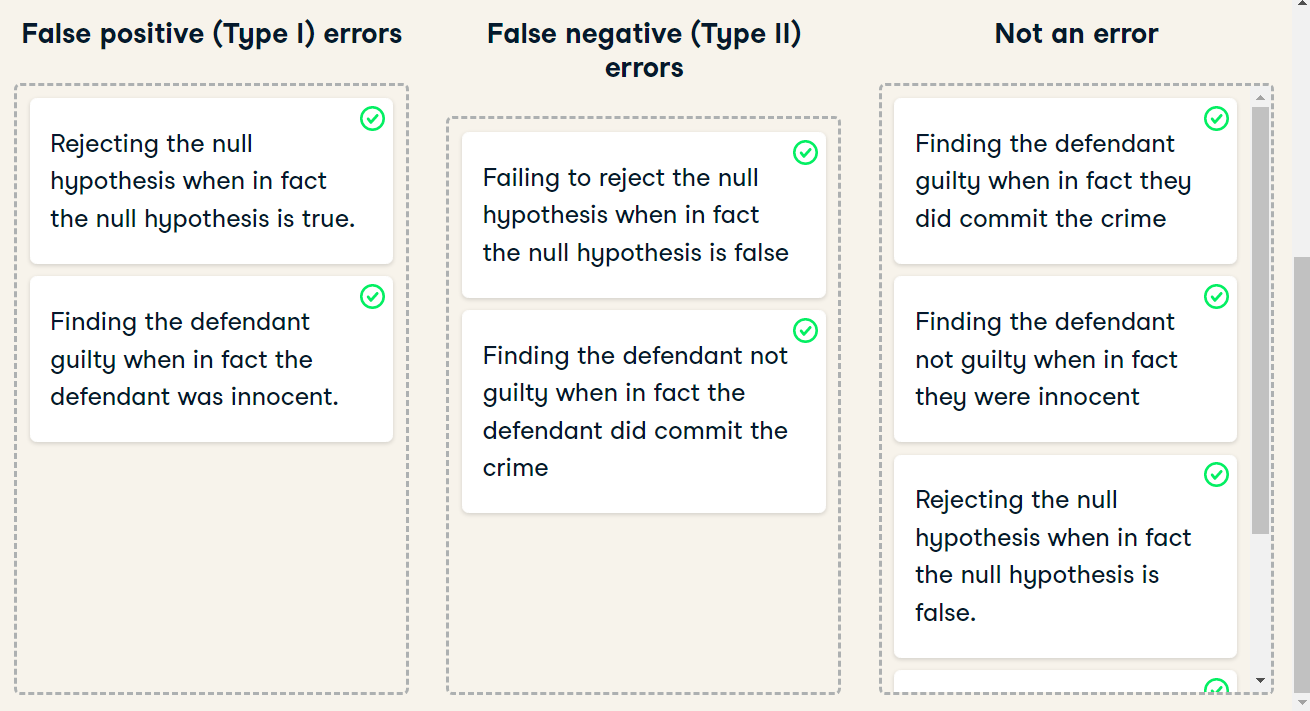

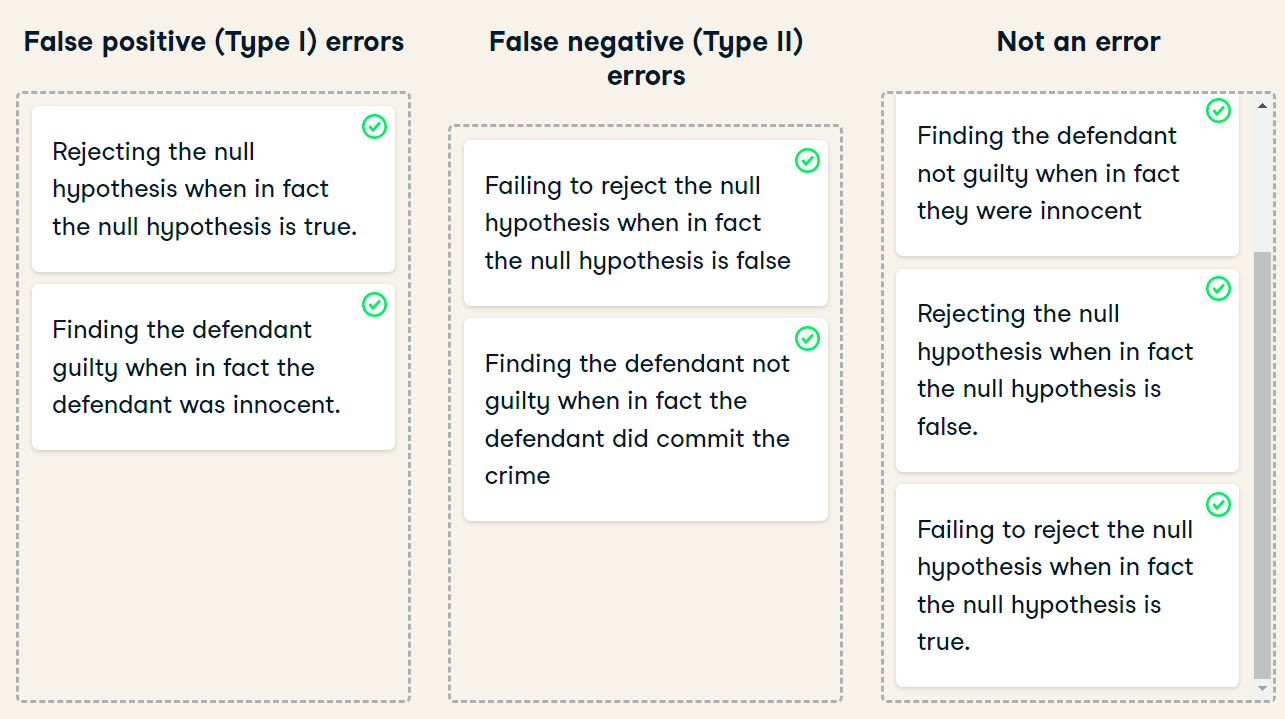

###**Effectuer des tests $t$**

####**1. Effectuer des tests $t$**

+ Dans le chapitre précédent, nous avons calculé le $z$-score, qui était une statistique de test pour une seule variable.

####**2. Problèmes à deux échantillons**
+ Ici, nous examinerons un problème connexe de comparaison des statistiques d’échantillon entre les groupes d’une variable. 

+ Dans le jeu de données Stack Overflow, converted_comp est une variable numérique de la rémunération annuelle. 

+ age_first_code_cut s’agit d’une variable catégorielle à deux niveaux: 
  + enfant et adulte, qui décrivent quand l’utilisateur a commencé à programmer. 
  
+ Nous pouvons poser des questions sur les différences de rémunération entre les deux groupes d’âge, par exemple, les utilisateurs qui ont programmé pour la première fois dans leur enfance sont-ils mieux rémunérés que ceux qui ont commencé à l’âge adulte?

####**3. Hypothèses**
+ ***L’hypothèse nulle est que la moyenne de la population pour les deux groupes est la même, et l’hypothèse alternative est que la moyenne de la population pour les utilisateurs qui ont commencé à coder dans l’enfance est supérieure à celle des utilisateurs qui ont commencé à coder à l’âge adulte.*** 

+ Nous pouvons écrire ces hypothèses à l’aide d’équations. 

+ **Mu ($μ$) représente une moyenne de population inconnue**, et nous utilisons des indices pour indiquer à quel groupe appartient la moyenne de population.

+  Une autre façon d’écrire les équations consiste à comparer les différences dans les moyennes de population à zéro. 

+ Zéro correspond ici à notre valeur hypothétique pour la différence de moyennes.

####**4. Calcul des statistiques récapitulatives par groupe**

+ Pour calculer des statistiques récapitulatives pour chaque groupe, nous commençons par l’échantillon, nous regroupons par la variable catégorielle, puis nous calculons sur la variable numérique. 

+ Une façon pandas de le faire est montrée, calculant la moyenne de la colonne converted_comp après regroupement par age_first_code_cut. 

+ Ici, les programmeurs enfants ont une rémunération moyenne de 132 000 dollars contre environ 111 000 pour les programmeurs adultes. 

+ Cette augmentation est-elle statistiquement significative ou pourrait-elle s’expliquer par la variabilité de l’échantillonnage?

####**5. Statistiques de test**

+ Bien que nous ne connaissions pas la moyenne de la population, nous l’estimons en utilisant la moyenne de l’échantillon. 

+ $X$-bar ($\bar{X}$) est utilisé pour désigner **une moyenne d’échantillon**. 

+ Ensuite, nous utilisons des indices pour indiquer à quel groupe correspond une moyenne d’échantillon. 

+ ***La différence entre ces deux moyennes d’échantillon est la statistique de test pour le test d’hypothèse***. 

+ **Les $z$-scores** que nous avons vus au chapitre 1 sont **un type de statistique de test standardisée**.

####**6. Normalisation de la statistique de test**

+ Les scores $z$ sont calculés en prenant la statistique de l’échantillon, en soustrayant la moyenne de cette statistique comme paramètre de population d’intérêt, puis en divisant par l’erreur-type. 

+ Dans les deux cas de l’échantillon, la statistique de test, notée $t$, utilise une équation similaire. 

+ Nous prenons la différence entre les statistiques de l’échantillon pour les deux groupes, soustrayons la différence de population entre les deux groupes, puis divisons par l’erreur-type.

####**7. Erreur-type**

+ Pour calculer l’erreur type, nécessaire pour le dénominateur de l’équation statistique de test, l’amorçage tend à être une bonne option. 

+ Cependant, il existe un moyen plus facile de l’approximer. 

+ Nous calculons l’écart-type de la variable numérique pour chaque groupe de l’échantillon et le nombre d’observations dans chaque groupe. 

+ Entrez ensuite ces valeurs dans l’équation et calculez le résultat.

####**8. En supposant que l’hypothèse nulle est vraie**

+ Voici à nouveau l’équation statistique du test. Si nous supposons que l’hypothèse nulle est vraie, il y a une simplification que nous pouvons faire. 

+ L’hypothèse nulle suppose que les moyennes de population sont égales et que leur différence est nulle, de sorte que le terme de population dans le numérateur disparaît. 

+ En insérant l’approximation de l’erreur-type, nous avons maintenant un moyen de calculer la statistique de test en utilisant uniquement des calculs sur l’ensemble de données de l’échantillon.

####**9. Calculs en supposant que l’hypothèse nulle est vraie**

+ Nous avons besoin de la moyenne, de l’écart-type et du nombre d’observations pour chaque groupe pour remplir la formule de $t$. 

+ Nous utilisons à nouveau des combinaisons groupby et méthode avec **moyenne, std et nombre**.

#####**10. Calcul de la statistique de test**

+ En assignant les valeurs à six variables différentes, le numérateur est une soustraction des moyennes de l’échantillon, et le dénominateur est comme une hypoténuse pondérée. 

+ La statistique $t$ est d’environ un point huit-sept. 

+ Tout comme pour les $z$-scores, nous ne pouvons pas encore tirer de conclusions; Pour cela, nous devrons attendre la prochaine vidéo.

####**11. Entraînons-nous!**
+ En attendant, calculons quelques statistiques de test.

###**EXERCICE**

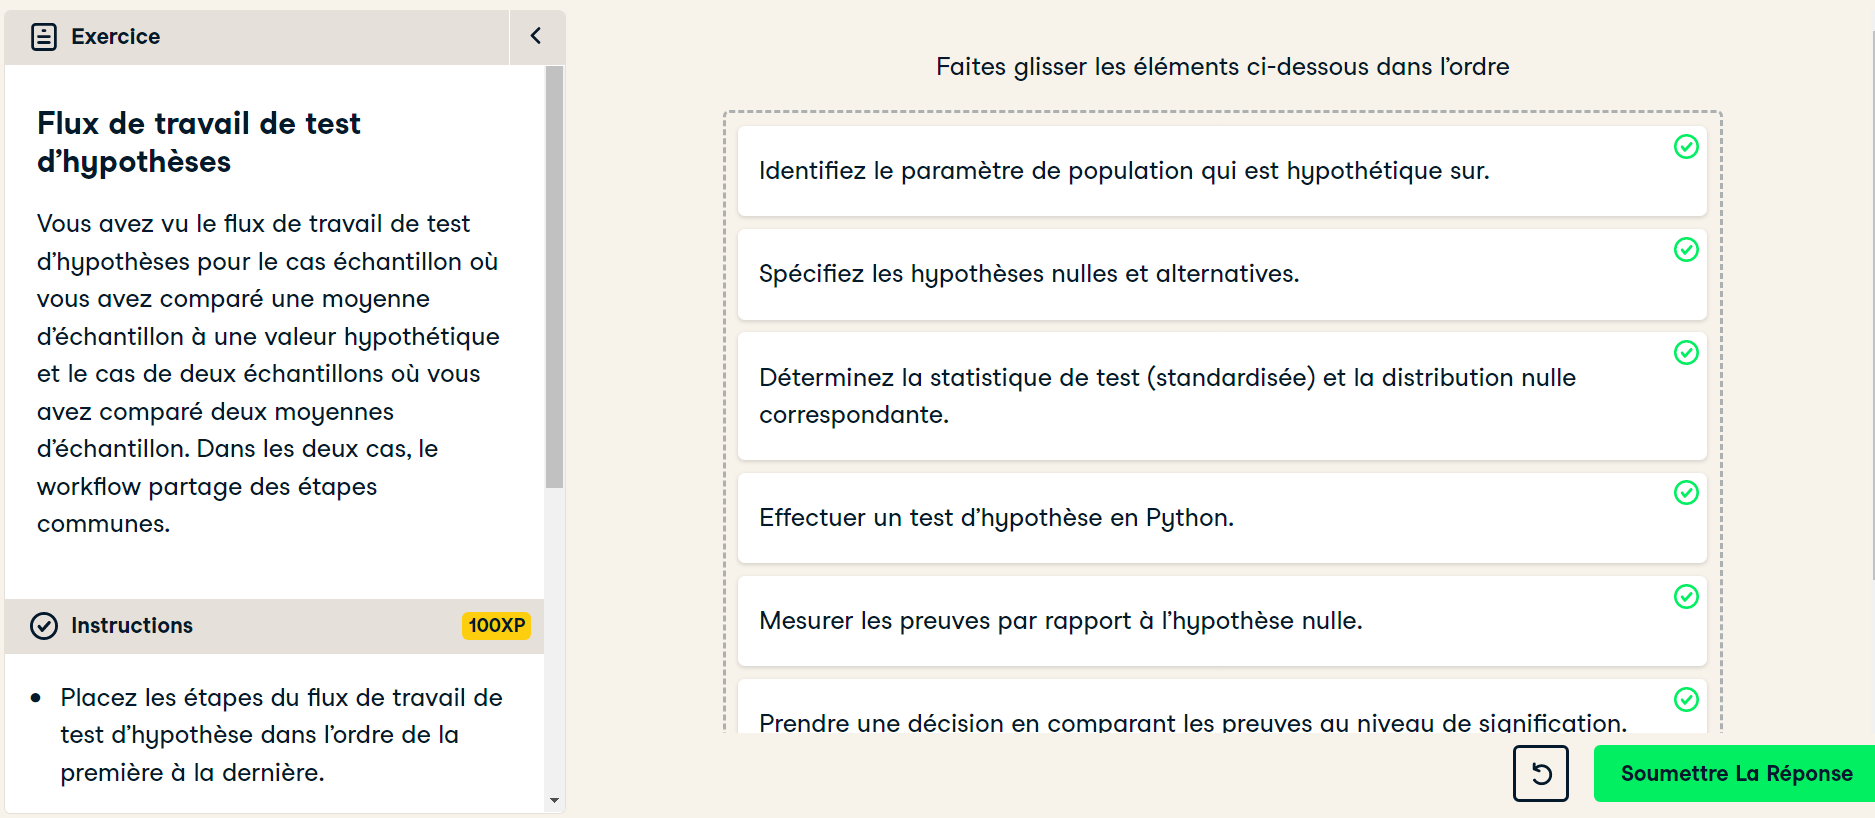

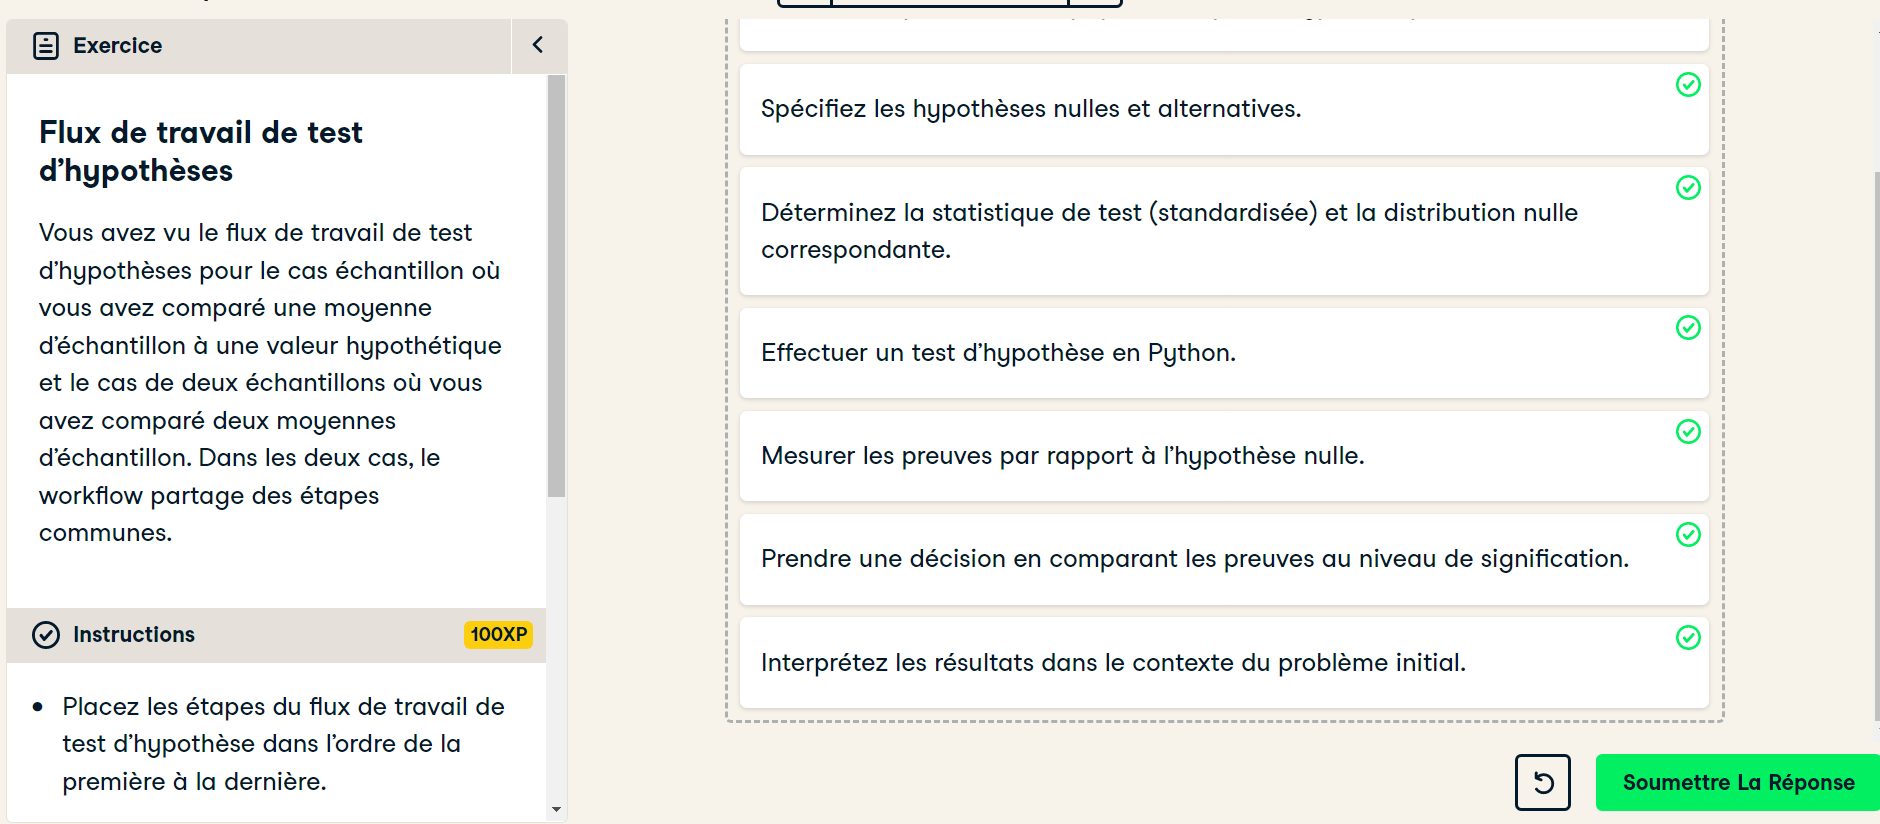

####**Deux échantillons de statistiques moyennes**

+ ***Le test d’hypothèse pour déterminer s’il y a une différence entre les moyennes de deux populations utilise un type de statistique de test différent des scores z que vous avez vus au chapitre 1***. 

+ ***Il est appelé « $t$ », et il peut être calculé à partir de trois valeurs de chaque échantillon en utilisant cette équation.***

$$
t = \dfrac{(\bar{x}_{\text{child}} - \bar{x}_{\text{adult}})}{\sqrt{\dfrac{s_{\text{child}}^2}{n_{\text{child}}} + \dfrac{s_{\text{adult}}^2}{n_{\text{adult}}}}}
$$

+ En essayant de déterminer pourquoi certaines expéditions sont en retard, vous pouvez vous demander si le poids des expéditions qui étaient à l'heure est inférieur au poids des expéditions qui étaient en retard. 

+ *L'ensemble de données late_shipments a été divisé en un groupe "yes", où late == "Yes" et un groupe "no" où late == "No". Le poids de l'envoi est indiqué dans la variable weight_kilograms.*

*Les moyennes d'échantillon pour les deux groupes sont disponibles sous la forme xbar_no et xbar_yes. Les écarts types de l'échantillon sont s_no et s_yes. Les tailles d'échantillon sont n_no et n_yes. numpy est aussi chargé comme np.*

####**Instructions**

+ Calculez le numérateur de la statistique du test $t$.
+ Calculez le dénominateur de la statistique du test $t$.
+ Utilisez ces deux nombres pour calculer la statistique du test $t$.

In [ ]:
late_shipments.columns

In [69]:
xbar = late_shipments.groupby('late')['weight_kilograms'].mean()

In [72]:
xbar_no = xbar[0]
xbar_yes = xbar[1]

In [73]:
s =  late_shipments.groupby('late')['weight_kilograms'].std()

In [74]:
s

late
No     3154.039507
Yes    2544.688211
Name: weight_kilograms, dtype: float64

In [75]:
s_no = s[0]
s_yes = s[1]

In [76]:
n = late_shipments.groupby('late')['weight_kilograms'].count()
n

late
No     939
Yes     61
Name: weight_kilograms, dtype: int64

In [77]:
n_no = n[0]
n_yes = n[1]

In [78]:
# Calculate the numerator of the test statistic
numerator = xbar_no - xbar_yes

# Calculate the denominator of the test statistic
denominator = np.sqrt(s_no ** 2 / n_no + s_yes ** 2 / n_yes)


# Calculate the test statistic
t_stat = numerator / denominator

# Print the test statistic
print(t_stat)

-2.3936661778766433


###**Calcul des valeurs p à partir des statistiques $t$**

####**1. Calcul des valeurs p à partir des statistiques $t$**

+ Dans la leçon précédente, nous avons calculé la statistique de test $t$.

####**2. Distributions $T$**

+ ***La statistique de test, $t$, suit une distribution $t$.*** 

+ ***Les distributions $t$ ont un paramètre appelé degrés de liberté, ou df en abrégé***. 

+ ***Voici un tracé linéaire du PDF d’une distribution $t$ avec un degré de liberté en jaune, et le PDF d’une distribution normale en tirets bleus***. 

+ Notez que la distribution $t$ pour de petits degrés de liberté a des queues plus grosses que la distribution normale, mais sinon elles se ressemblent.

####**3. Degrés de liberté**
+ Au fur et à mesure que nous augmentons les degrés de liberté, la distribution $t $se rapproche de la distribution normale. 

+ En fait, une distribution normale est une distribution $t$ avec des degrés infinis de liberté. 

+ Les degrés de liberté sont définis comme le nombre maximal de valeurs logiquement indépendantes dans l’échantillon de données. 

+ C’est un concept assez délicat, alors essayons un exemple.

####**4. Calcul des degrés de liberté**


+ Supposons que notre ensemble de données comporte 5 observations indépendantes et que quatre des valeurs soient 2, 6, 8 et 5. 

+ Supposons que nous sachions également que la moyenne de l’échantillon est de 5. 

+ Avec cette connaissance, la cinquième valeur n’est plus indépendante; il doit être 4. 

+ Même si les cinq observations de l’échantillon étaient indépendantes, parce que nous connaissons un fait supplémentaire sur l’échantillon 
  - c’est-à-dire a une moyenne de 5 
  - nous n’avons que 4 degrés de liberté. 
  
+ Dans notre cas à deux échantillons, il y a autant de degrés de liberté que d’observations, moins deux parce que nous connaissons deux statistiques d’échantillon, les moyennes pour chaque groupe.

####**5. Hypothèses**
+ Rappelez-vous les hypothèses de notre question Stack Overflow sur la compensation pour les deux groupes d’âge. 

+ Puisqu’il s’agit d’une hypothèse alternative « supérieure à », nous avons besoin d’un test à droite.

####**6. Niveau d’importance**


+ Nous allons calculer une valeur de $p$ dans un instant, mais nous devons d’abord décider d’un niveau de signification. 

+ Il y a plusieurs possibilités; Utilisons Point-One. 

+ Cela signifie que nous rejetons l’hypothèse nulle en faveur de l’alternative si la valeur de $p$ est inférieure ou égale au point un.

####**7. Calcul des valeurs $p$ : une proportion contre une valeur**


+ Dans le chapitre 1, pour obtenir la valeur $p$, nous avons transformé le $z$-score avec le CDF normal. 

+ Comme il s’agissait d’un test à droite, nous avons soustrait le résultat d’un seul. 

+ Dans la vidéo précédente, nous avons utilisé une approximation pour l’erreur type de la statistique de test à l’aide d’informations d’échantillon. 

+ L’utilisation de cette approximation ajoute plus d’incertitude et c’est pourquoi il s’agit d’un problème $t$ au lieu d’un $z$. 

+ ***La distribution $t$ permet plus d’incertitude lors de l’utilisation de plusieurs estimations dans un seul calcul statistique***. 

+ Ici, les estimations multiples correspondent à la moyenne de l’échantillon et à l’écart-type de l’échantillon.

####**8. Calcul des valeurs $p$ : deux moyennes de groupes différents**


+ Maintenant que nous calculons les moyennes plutôt que les proportions, le score $z$ est remplacé par une statistique de test $$t. 

+ Il s’agit de la valeur calculée dans la vidéo précédente. 

+ Le calcul nécessite également les degrés de liberté, qui sont le nombre total d’observations dans les deux groupes, moins deux.

####**9. Calcul des valeurs $p$ : deux moyennes de groupes différents**


+ ***Pour calculer la valeur de $p$, nous devons transformer la statistique de test en utilisant le CDF de distribution $t$ au lieu du CDF de distribution normale.*** 

+ Notez l’utilisation de ***t.cdf*** au lieu de ***norm.cdf***, et que l’argument ***df est défini sur les degrés de liberté***. 

+ Cette valeur de $p$ est inférieure au niveau de signification du point un, nous devrions donc rejeter l’hypothèse nulle en faveur de l’hypothèse alternative selon laquelle les scientifiques des données Stack Overflow qui ont commencé à coder dans leur enfance gagnent plus.

####**10. Entraînons-nous!**
+ Alors que je réévalue ma propre enfance et que je me demande pourquoi je n’ai pas commencé à programmer plus tôt, il est temps pour vous de faire quelques exercices.

###**EXERCICE**

####**Pourquoi est-ce nécessaire?**

+ Le processus de calcul des valeurs $p$ consiste à commencer par la statistique de l’échantillon, à la normaliser pour obtenir une statistique de test, puis à la transformer via une fonction de distribution cumulative. 

+ Au chapitre 1, cette transformation finale a été notée $t$, et la transformation CDF utilisait la distribution $z$ (normale standard). 

+ Dans la dernière vidéo, la statistique de test était indiquée $t$, et la transformation a utilisé la distribution $t$.

+ *Dans quel scénario de test d’hypothèse une distribution $t$ est-elle nécessaire à la place de la distribution $z$ ?*

####**Réponds à la question**

####**Réponses possibles**

+ La distribution $t$ est juste un autre nom pour la distribution $z$, de sorte qu’ils peuvent être utilisés de manière interchangeable.

+ La distribution $t$ est la même chose que la distribution $z$ pour les échantillons de très petite taille.

+ ***Lorsqu’un échantillon d’écart-type est utilisé pour estimer une erreur-type.***

+ Lorsque vous comparez les moyennes de trois échantillons ou plus, plutôt que de comparer une seule moyenne d’échantillon à une valeur.

####**La distribution $t$**

+ ***La distribution $t $est utilisée pour calculer la valeur de $p$ à partir de la $t$ et avoir une idée de l’apparence du PDF et du CDF peut vous aider à comprendre ce calcul***. 

+ Il a deux paramètres: ***les degrés de liberté et le paramètre de non-centralité.***

+ ***Les graphiques montrent le PDF et le CDF pour une distribution $t$ (ligne noire continue) et, pour comparaison, montrent une distribution normale avec la même moyenne et la même variance (ligne pointillée grise).***


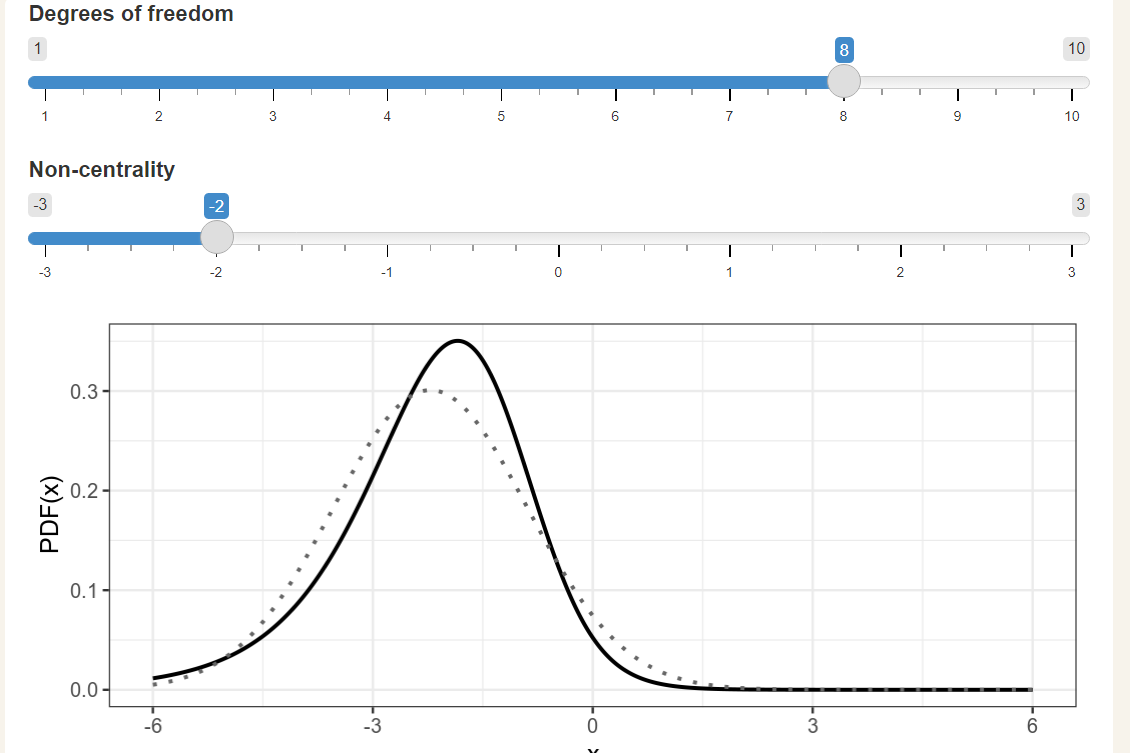

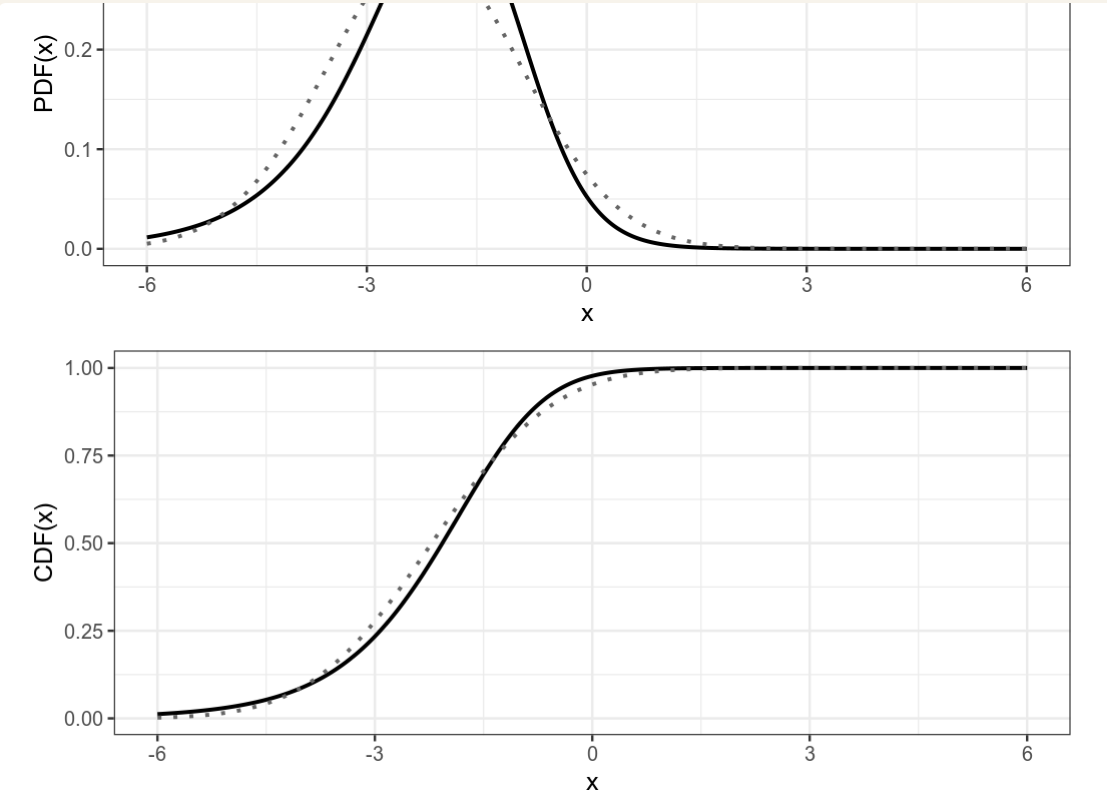

*Quelle affirmation sur la distribution t est vraie?*

####**Instructions**


+ Comme la distribution normale, le PDF d’une distribution t centrale est toujours symétrique.

+ Au fur et à mesure que vous augmentez les degrés de liberté, les queues de la distribution t grossissent.

+ ***Au fur et à mesure que vous augmentez les degrés de liberté, les courbes PDF et CDF de la distribution t se rapprochent de celles d’une distribution normale.***

+ Au fur et à mesure que vous augmentez la non-centralité, les courbes PDF et CDF de la distribution t se rapprochent de celles d’une distribution normale.

####**De t à p**


+ *Auparavant, vous avez calculé la statistique de test pour le problème à deux échantillons consistant à déterminer si le poids moyen des envois est plus faible pour les envois qui n'étaient pas en retard **(en retard == "Non")** par rapport aux envois qui étaient en retard **(en retard == "Oui")**.*

+ *Afin de prendre des décisions à ce sujet, vous devez transformer la statistique de test avec une fonction de distribution cumulative pour obtenir une valeur $p$.*

+ Rappelez-vous les hypothèses :

  + $H_{0}$: Le poids moyen des envois qui n'étaient pas en retard est le même que le poids moyen des envois qui étaient en retard.

  + $H_{A}$: Le poids moyen des envois qui n'étaient pas en retard est inférieur au poids moyen des envois qui étaient en retard.

*La statistique de test, t_stat, est disponible, ainsi que la taille des échantillons pour chaque groupe, n_no et n_yes. Utilisez un niveau de signification de alpha = 0,05.*

*$t$ a également été importé de scipy.stats.*

####**Instructions**

+ De quel type de test avons-nous besoin selon l'hypothèse alternative ?

####**Réponses possibles**

+ Test bilatéral

+ ***Queue gauche***

+ Queue droite

+ Calculez les degrés de liberté pour le test.
+ Calculez la valeur $p$ en utilisant la statistique du test, t_stat.

In [79]:
from scipy.stats import t

In [80]:
# Calculate the degrees of freedom
degrees_of_freedom = n_no + n_yes - 2
print(degrees_of_freedom)

# Calculate the p-value from the test stat
p_value = t.cdf(t_stat, df=degrees_of_freedom)

# Print the p_value
print(p_value)

998
0.008432382146249523


####**Question**
+ *Quelle décision devez-vous prendre en fonction des résultats du test d'hypothèse ?*

####**Réponses possibles**

+ Ne pas rejeter l'hypothèse nulle.

+ ***Rejeter l'hypothèse nulle***.

+ Vous ne pouvez rien conclure de ce test d'hypothèse.

###**Tests $t$ appariés**

####**1. Tests $t$ appariés**


+ Auparavant, nous utilisions la distribution $t$ pour calculer une valeur de $p$ à partir d’une statistique de test standardisée liée à la différence de moyennes entre deux groupes.

####**2. Ensemble de données sur les présidents républicains américains**

+ Voici un ensemble de données sur les élections présidentielles américaines. 

+ Chaque rangée représente une élection présidentielle au niveau du comté. 

+ Les variables de l’ensemble de données sont l’État américain, le comté de cet État et le pourcentage de votes pour le candidat républicain en 2008 et en 2012.

  + https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ


####**3. Hypothèses**
+ Une question est de savoir si le pourcentage de votes pour le candidat républicain était plus faible en 2008 par rapport à 2012. 

+ Pour tester cela, nous formons des hypothèses. Comme précédemment, l’hypothèse nulle est que notre intuition est fausse et que les paramètres de population sont les mêmes dans chaque groupe d’années. 

+ L’hypothèse alternative est que le paramètre en 2008 était inférieur à celui de 2012. 

+ Fixons un niveau de signification de point zéro-cinq. 

+ L’une des caractéristiques de cet ensemble de données est que les votes de 2008 et les votes de 2012 sont appariés, ce qui signifie qu’ils ne sont pas indépendants, car ils se réfèrent tous deux au même comté. 

+ Cela signifie que des habitudes de vote peuvent se produire en raison de la démographie au niveau du comté et de la politique locale, et nous voulons capturer cette association dans notre modèle.

####**4. De deux échantillons à un**

+ Pour les analyses par paires, plutôt que de considérer les deux variables séparément, nous pouvons considérer une seule variable de la différence. 

+ Ceci est stocké dans un DataFrame appelé **sample_data** avec une colonne nommée **diff**. 

+ Dans cet histogramme de la différence, la plupart des valeurs sont comprises entre moins dix et dix, avec au moins une valeur aberrante.

####**5. Calculer des statistiques d’échantillon de la différence**

+ La moyenne de l’échantillon, x-bar ou $\bar{x}$, est calculée à partir de cette différence. C’est environ moins deux points-huit-huit.

####**6. Hypothèses révisées**

+ Nous pouvons reformuler les hypothèses en termes de moyenne de population unique, mu-diff ou $\mu_{diff}$, égale ou inférieure à zéro. 

+ La statistique de test, $t$, a une équation légèrement plus simple par rapport aux deux cas échantillons. 

+ Nous avons une statistique, donc le nombre de degrés de liberté est le nombre de paires moins une.

####**7. Calcul de la valeur de $p$**


+ Pour calculer la statistique de test, nous avons besoin du nombre de lignes dans le jeu de données, cent, et de l’écart-type des différences. 

+ Nous avons déjà calculé x-bar-diff ou $\bar{x}_{diff}$, la moyenne des différences, comme moins deux points-huit-huit. 

+ En supposant que l’hypothèse nulle est vraie, mu-diff est nul. 

+ Nous avons maintenant tout ce dont nous avons besoin pour nous connecter à l’équation pour calculer $t$. C’est moins cinq points-six. 

+ Les degrés de liberté sont inférieurs de un à n-diff ou $n_{diff}$ à quatre-vingt-dix-neuf. 

+ Enfin, nous transformons $t$ avec le CDF t-distribution. 

+ La valeur de $p$ est vraiment petite à environ neuf virgule six fois dix à moins huit. 

+ Cela signifie que nous rejetons l’hypothèse nulle en faveur de l’hypothèse alternative selon laquelle les candidats républicains ont obtenu un pourcentage plus faible des voix en 2008 par rapport à 2012.

####**8. Tester les différences entre deux signifie à l’aide de ttest()**

+ C’était beaucoup de calcul. Heureusement, il existe un moyen plus simple. 

+ **Le package pingouin** fournit différentes méthodes pour tester les hypothèses et renvoie les résultats sous forme de DataFrame pandas. 

+ Sa sortie peut être un peu plus conviviale à utiliser que des méthodes similaires de **scipy-dot-stats**. 

+ Une méthode de pingouin est ttest et elle fonctionne avec des objets de type tableau, donc le premier argument est la série de différences. 

+ Pour un test converti d’un échantillon comme celui-ci, y spécifie la valeur de différence hypothétique par rapport à l’hypothèse nulle, qui est nulle. 

+ Le type d’hypothèse alternative peut être spécifié comme bilatéral, inférieur ou supérieur, correspondant respectivement aux tests bilatéraux, à gauche et à droite. Voici le résultat. 

+ Nous pouvons reconnaître ***la valeur de la statistique de test, les degrés de liberté, la direction alternative et la valeur de p***. 

+ Les résultats supplémentaires se réfèrent à des concepts statistiques plus avancés qui sortent du cadre de ce cours.

  + Les détails sur les retours de **pingouin.ttest()** sont disponibles dans les documents API pour pingouin à 
    + https://pingouin-stats.org/generated/pingouin.ttest.html#pingouin.ttest.


####**9. ttest() avec paired=True**

+ Il existe une variation de ttest pour les données appariées qui nécessite encore moins de travail. 

+ Plutôt que de calculer la différence entre les deux variables appariées, nous pouvons simplement les passer toutes les deux directement à ttest comme $x$ et $y$, et les mettre appariées à True. 

+ Notez que les résultats dans les quatre premières colonnes sont les mêmes que précédemment.

####**10. Ttest() non apparié**

+ Si nous ne définissons pas apparié sur True et effectuons à la place un test $t$ non apparié, les nombres changent. La statistique de test est plus proche de zéro, il y a plus de degrés de liberté et la valeur de $p$ est beaucoup plus grande. 

+ L’exécution d’un test $t$ non apparié lorsque nos données sont appariées augmente les risques d’erreurs faussement négatives.

####**11. Entraînons-nous!**
+ Il est temps d’effectuer un peu d’appariement.

###**EXERCICE**

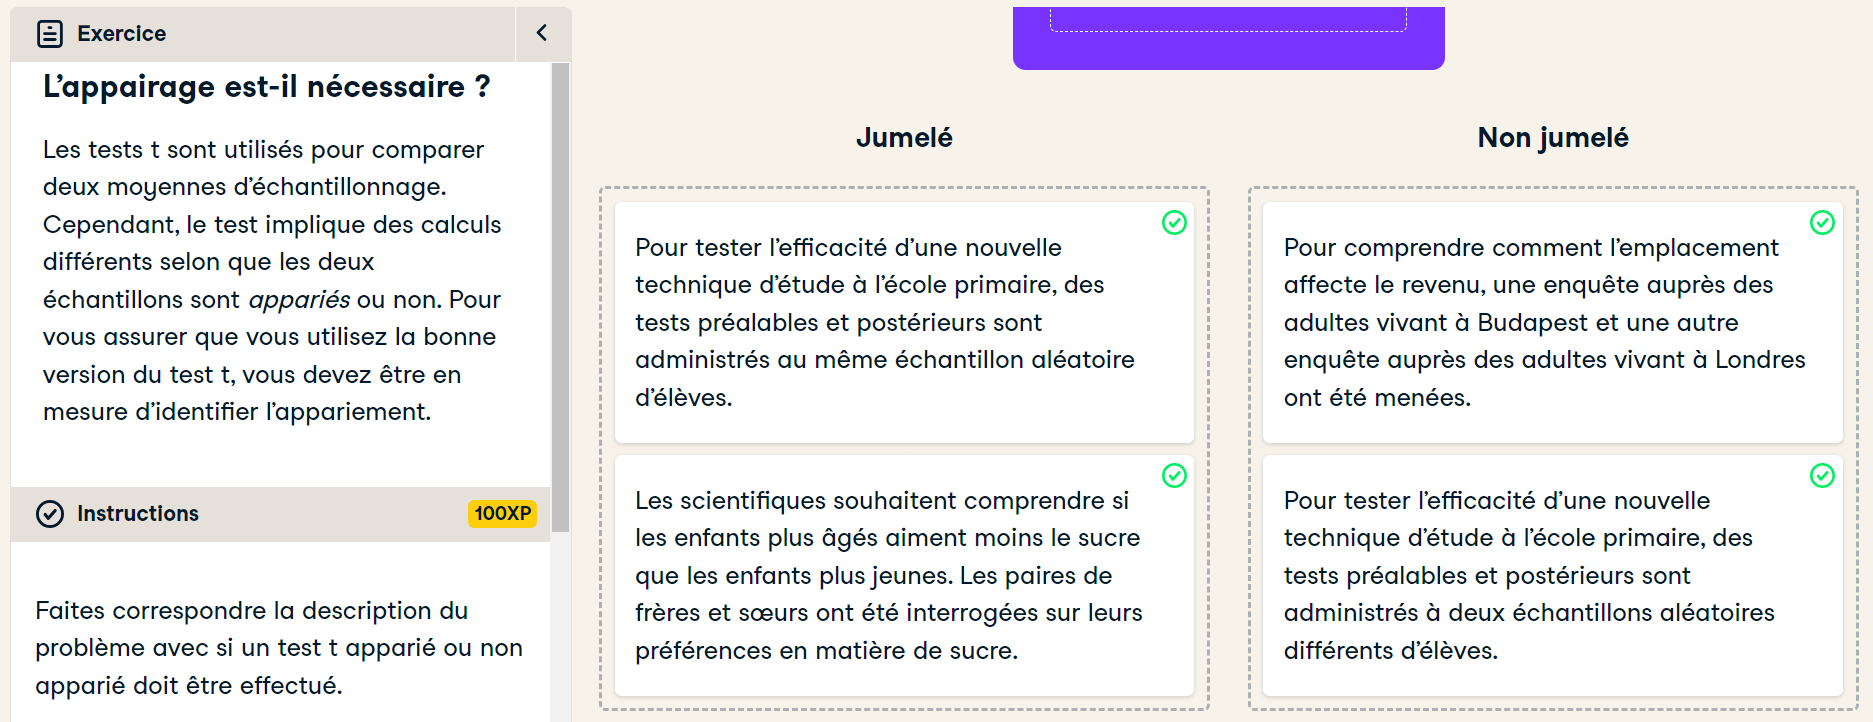

####**Visualisation de la différence**

+ *Avant de commencer à exécuter des tests d'hypothèse, il est bon d'effectuer une analyse exploratoire des données, c'est-à-dire de calculer des statistiques sommaires et de visualiser les distributions.*

+ *Ici, vous allez examiner la proportion de votes au niveau du comté pour le candidat démocrate en 2012 et 2016, sample_dem_data. Comme les comtés sont les mêmes les deux années, ces échantillons sont appariés. Les colonnes contenant les échantillons sont dem_percent_12 et dem_percent_16.*

+ *dem_votes_potus_12_16 est disponible comme sample_dem_data. pandas et matplotlib.pyplot sont chargés avec leurs alias habituels.*

####**Instructions** 
+ Créez une nouvelle colonne diff contenant le pourcentage de votes pour le candidat démocratique en 2012 moins le pourcentage de votes pour le candidat démocratique en 2016.

+ Calculez la moyenne de la colonne diff comme xbar_diff.

+ Calculez l'écart-type de la colonne diff comme s_diff.

+ Tracez un histogramme de la colonne diff avec 20 cases.

In [83]:
dem_votes_potus_12_16.head()

,state,county,dem_percent_12,dem_percent_16
0,Alabama,Bullock,76.305900,74.946921
1,Alabama,Chilton,19.453671,15.847352
2,Alabama,Clay,26.673672,18.674517
3,Alabama,Cullman,14.661752,10.028252
4,Alabama,Escambia,36.915731,31.020546


In [84]:
sample_dem_data = dem_votes_potus_12_16

In [85]:
# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Print sample_dem_data
print(sample_dem_data)

       state       county  dem_percent_12  dem_percent_16       diff
0    Alabama      Bullock       76.305900       74.946921   1.358979
1    Alabama      Chilton       19.453671       15.847352   3.606319
2    Alabama         Clay       26.673672       18.674517   7.999155
3    Alabama      Cullman       14.661752       10.028252   4.633500
4    Alabama     Escambia       36.915731       31.020546   5.895185
..       ...          ...             ...             ...        ...
495  Wyoming        Uinta       19.065464       14.191263   4.874201
496  Wyoming     Washakie       20.131846       13.948610   6.183235
497   Alaska   District 3       33.514582       16.301064  17.213518
498   Alaska  District 18       61.284271       52.810051   8.474220
499   Alaska  District 24       42.913980       39.405286   3.508694

[500 rows x 5 columns]


In [87]:
# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()

# Print xbar_diff
print(xbar_diff) #  6.829312660106834

6.829312660106834


In [88]:
# Find the standard deviation of the diff column
s_diff = sample_dem_data['diff'].std()

# Print s_diff
print(s_diff)

5.040139140132317


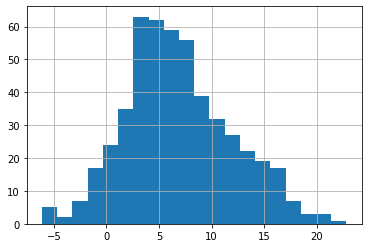

In [89]:
import matplotlib.pyplot as plt

# Plot a histogram of diff with 20 bins
sample_dem_data['diff'].hist(bins=20)

plt.show()

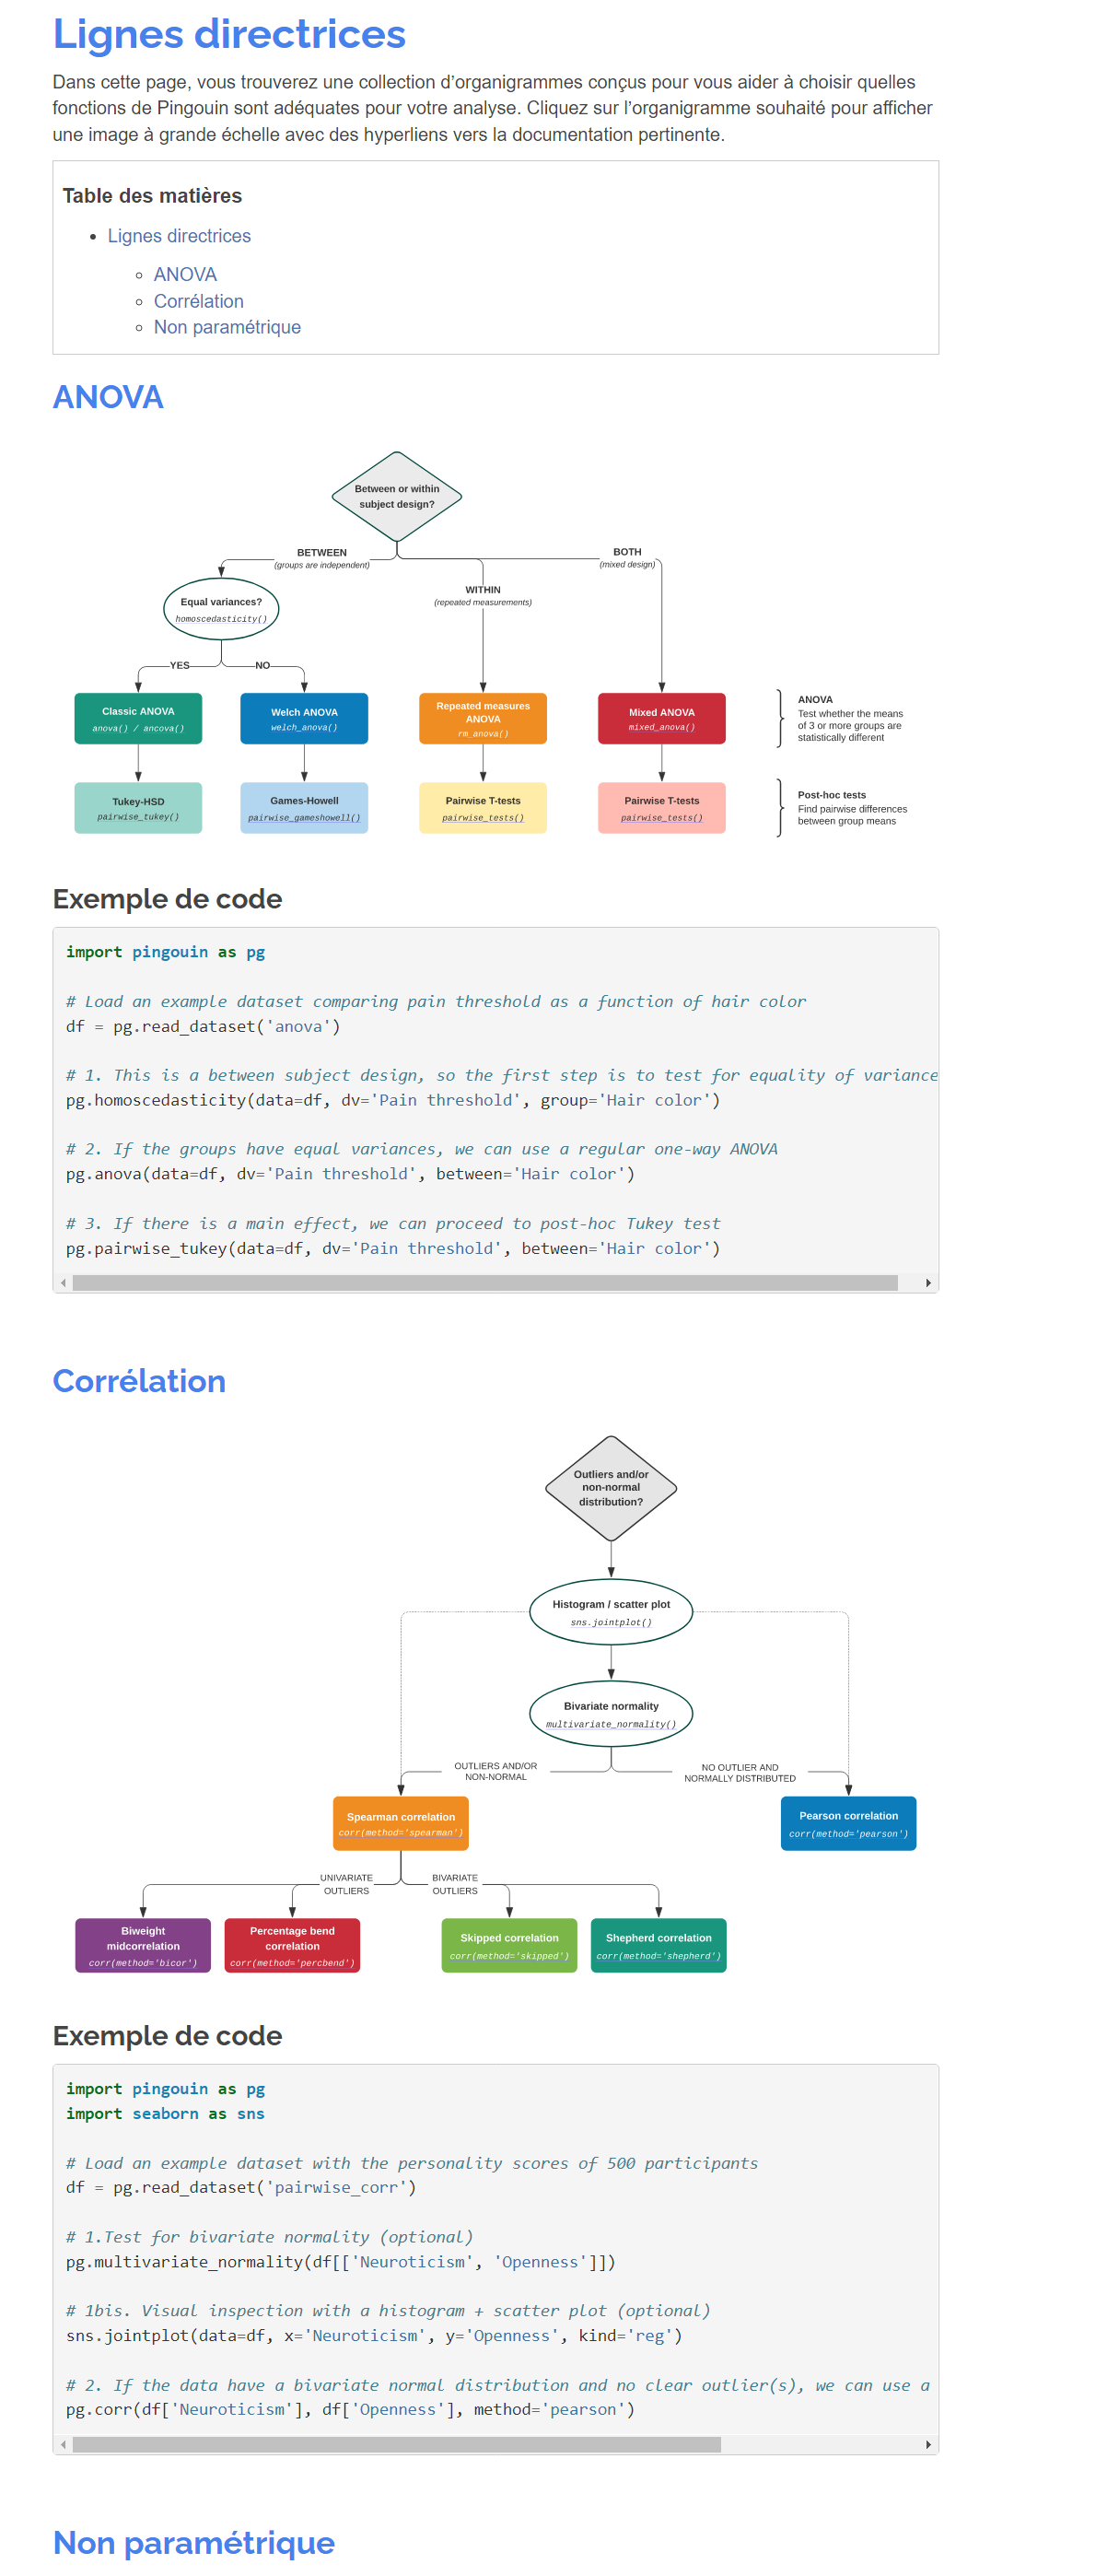

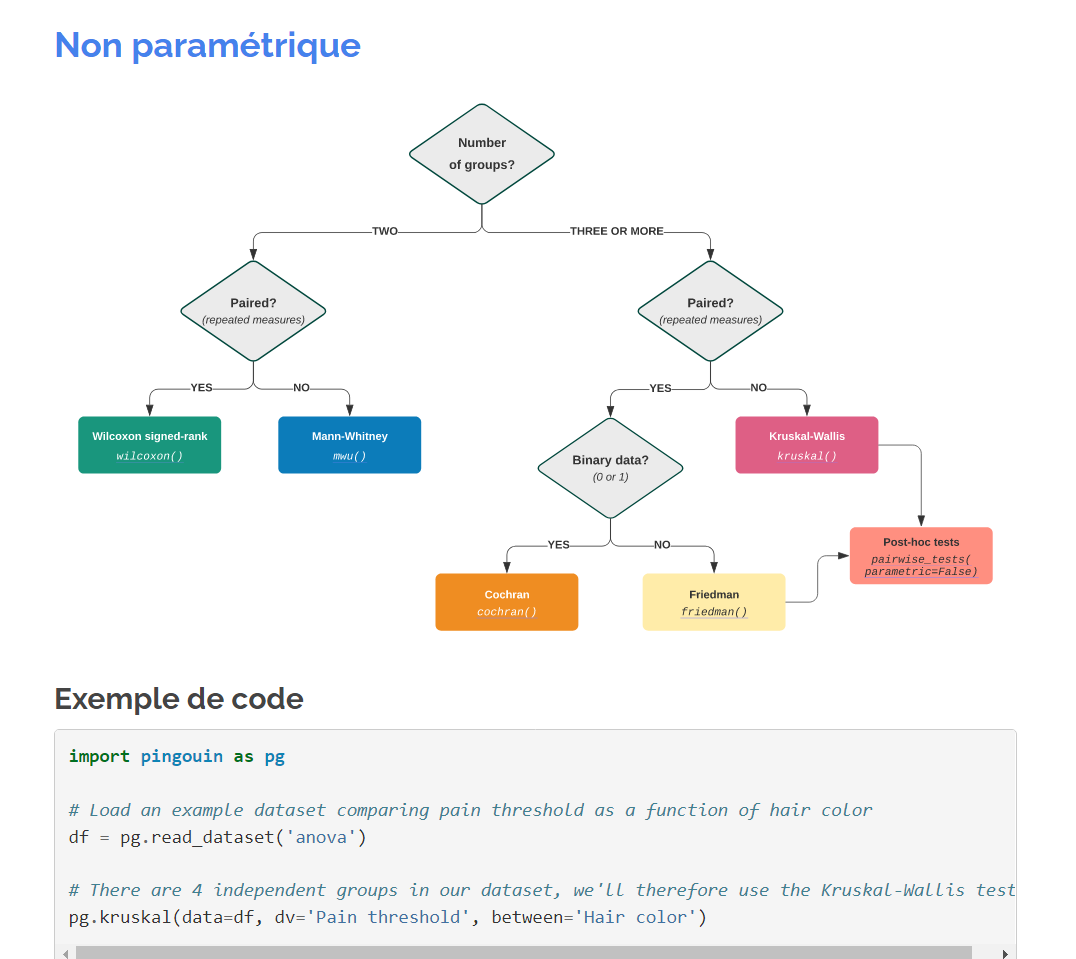

####**Utilisation de ttest()**

+ *Calculer manuellement des statistiques de test et les transformer avec un CDF pour obtenir une valeur $p$ représente beaucoup d'efforts pour comparer les moyennes de deux échantillons.* 

+ *La comparaison de deux moyennes d'échantillons est appelée un test $t$, et le paquetage Python **pingouin** possède une méthode $.ttest()$ pour l'accomplir. Cette méthode offre une certaine flexibilité dans la façon dont vous effectuez le test.*

+ *Comme dans l'exercice précédent, vous allez explorer la différence entre la proportion de votes au niveau du comté pour le candidat démocrate en 2012 et 2016 afin d'identifier si la différence est significative. Les hypothèses sont les suivantes* :

  + $H_{0}$ : La proportion de votes démocrates en 2012 et 2016 était la même. 
  + $H_{A}$ : La proportion de votes démocratiques en 2012 et 2016 était différente.

+ *sample_dem_data est disponible et possède les colonnes diff, dem_percent_12, et dem_percent_16 en plus des noms d'états et de comtés. pingouin et a été chargé avec pandas comme pd.*

####**Instructions**

+ 1) Effectuez un test $t$ sur les différences de l'échantillon (la colonne **diff** de **sample_dem_data**), en utilisant une hypothèse alternative appropriée choisie parmi **"two-sided", "less", et "greater"**.

####**2) Question**

+ Quelle est la décision correcte du test t, en supposant que $\alpha = 0.01$ ?

####**Réponses possibles**

+ Ne pas rejeter l'hypothèse nulle.

+ ***Rejeter l'hypothèse nulle.***

+ Vous ne pouvez rien conclure de ce test d'hypothèse.

+ 3) Effectuez un test par paires sur les votes démocrates en 2012 et 2016 (les colonnes dem_percent_12 et dem_percent_16 de sample_dem_data), en utilisant une hypothèse alternative appropriée.

####**4) Question**
+ Comparez le test $t$ apparié à un test non apparié (inapproprié) sur les mêmes données. Comment la valeur $p$ change-t-elle ?

      pingouin.ttest(x=sample_dem_data['dem_percent_12'], 
               y=sample_dem_data['dem_percent_16'], 
               alternative="two-sided")


####**Réponses possibles**

+ La valeur $p$ du test non apparié est inférieure à la valeur $p$ du test apparié.

+ La valeur $p$ du test non apparié est égale à la valeur $p$ du test apparié.

+ ***La valeur $p$ du test non apparié est supérieure à la valeur $p$ du test apparié.***

In [ ]:
!pip install pingouin

In [91]:
import pingouin

In [92]:
# Conduct a t-test on diff
test_results = pingouin.ttest(x=sample_dem_data['diff'],
                              y=0,
                              alternative='two-sided')

                              
# Print the test results
print(test_results)

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  1.354985   

              BF10  power  
T-test  2.246e+111    1.0  


In [95]:
# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data['diff'], 
                              y=0,
                              paired=True)



                              
# Print the paired test results
print(paired_test_results)

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  1.354985   

              BF10  power  
T-test  2.246e+111    1.0  


/usr/local/lib/python3.8/dist-packages/pingouin/parametric.py:227: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")


In [96]:
pingouin.ttest(x=sample_dem_data['dem_percent_12'], 
               y=sample_dem_data['dem_percent_16'], 
               alternative="two-sided")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,7.181565,998,two-sided,1.345737e-12,"[4.96, 8.7]",0.454202,4.308e+09,1.0


###**Tests ANOVA**

####**1. Tests ANOVA**
+ Nous avons vu comment comparer deux groupes dans les cas non appariés et appariés. 

+ ***Mais que se passe-t-il s’il y a plus de deux groupes?**

####**2. Satisfaction au travail : 5 catégories**

+ L’enquête Stack Overflow comprend une variable de satisfaction au travail, avec cinq catégories allant de « Très satisfait » à « Très insatisfait ».

####**3. Visualisation de plusieurs distributions**

+ Supposons que nous voulions savoir si la rémunération annuelle moyenne est différente pour chacun des niveaux de satisfaction au travail. 

+ La première chose à faire est de visualiser les distributions avec des diagrammes en boîte. 

+ La méthode boxplot de Seaborn offre ici une option intéressante avec converted_comp sur l’axe horizontal et job_sat sur l’axe vertical en utilisant les données stack_overflow. 

+ « Très satisfait » semble légèrement plus élevé que les autres, mais pour voir s’ils sont significativement différents, nous devrons utiliser des tests d’hypothèse.

####**4. Analyse de la variance (ANOVA)**

+ Les tests ANOVA déterminent s’il existe des différences entre les groupes. Nous commençons par fixer notre niveau de signification au deuxième point. 

+ Cette valeur est plus grande que dans de nombreuses situations, mais elle nous aidera à comprendre les implications de la comparaison ultérieure de différents nombres de groupes. 

+ Nous utilisons la méthode pingouin anova pour comparer les valeurs de plusieurs groupes. 

+ Nous spécifions les données comme stack_overflow, la variable dépendante, dv, comme converted_comp, et la colonne de groupes à calculer entre comme job_sat. 

+ La valeur de $p$ est stockée dans la colonne p-unc, qui est point zéro-zéro-un-trois, qui est plus petite que alpha à 20 pour cent. 

+ Cela signifie qu’au moins deux des catégories de satisfaction au travail présentent des différences significatives entre leurs niveaux de rémunération, mais cela ne nous dit pas de quelles deux catégories il s’agit.

####**5. Tests par paires**

+ Pour identifier les catégories différentes, nous comparons les cinq catégories de satisfaction au travail, en testant chaque paire à tour de rôle. 

+ Il y a dix façons de choisir deux éléments parmi un ensemble de cinq, nous avons donc dix tests à effectuer. 

+ Notre niveau de signification est toujours le deuxième point.

####**6. pairwise_tests()**


+ Pour exécuter tous ces tests d’hypothèse en une seule fois, nous pouvons utiliser pairwise_tests. 

+ Les trois premiers arguments de data, dv et between sont les mêmes que la méthode anova. 

+ Nous discuterons de **p-adjust** sous peu. 

+ Le résultat montre un DataFrame où A et B sont les deux niveaux comparés sur chaque ligne. 

+ Ensuite, nous examinons la colonne p-unc des valeurs $p$. 

+ Trois d’entre eux sont inférieurs à notre niveau de signification du point deux.

####**7. À mesure que le nombre de groupes augmente...**
+ Dans ce cas, nous avons cinq groupes, ce qui donne dix paires. 

+ Au fur et à mesure que le nombre de groupes augmente, le nombre de paires - et donc le nombre de tests d’hypothèse que nous devons effectuer - augmente quadratiquement. 


+ Plus nous effectuons de tests, plus il y a de chances qu’au moins l’un d’entre eux donne un résultat significatif faussement positif. 

+ Avec un niveau de signification du point deux, si nous effectuons un test, la probabilité d’un résultat faussement positif est le deuxième point. 

+ Avec cinq groupes et dix tests, la probabilité d’au moins un faux positif est d’environ le point sept. 

+ Avec vingt groupes, il est presque garanti que nous obtiendrons au moins un faux positif.

####**8. Correction de Bonferroni**

+ ***La solution à ce problème est d’appliquer un ajustement pour augmenter les valeurs $p$, réduisant ainsi le risque d’obtenir un faux positif.***

+ ***Un ajustement courant est la correction de Bonferroni.*** 

+ Si l’on regarde la colonne $p$-corr correspondant aux valeurs $p$ corrigées, par opposition à la colonne $p$-unc pour non corrigée, seules deux des paires semblent présenter des différences significatives.

####**9. Plus de méthodes**


+ Pingouin fournit plusieurs options pour ajuster les valeurs $p$, certaines étant plus conservatrices que d’autres. 

+ Aucun ajustement sans aucun n’est la valeur par défaut, mais dans presque toutes les situations de test $t$ par paires, le choix d’une méthode de correction est plus approprié.

####**10. Entraînons-nous!**
+ Faisons beaucoup de tests.

###**EXERCICE**

####**Visualisation de plusieurs catégories**


+ Jusqu'à présent dans ce chapitre, nous n'avons considéré que le cas des différences dans une variable numérique entre deux catégories. 

+ Bien sûr, de nombreux ensembles de données contiennent plus de catégories. 

+ Avant d'effectuer des tests sur de nombreuses catégories, il est souvent utile de procéder à une analyse exploratoire des données (AED), en calculant des statistiques sommaires pour chaque groupe et en visualisant les distributions de la variable numérique pour chaque catégorie à l'aide de diagrammes en boîte.

+ Ici, nous allons revenir aux données sur les expéditions tardives, et à la façon dont le prix de chaque colis (pack_price) varie entre les trois modes d'expédition (shipment_mode) : 
  + **"Air", "Air Charter", et "Ocean"**.

*late_shipments est disponible ; pandas et matplotlib.pyplot sont chargés avec leurs alias standards, et seaborn est chargé en tant que sns.*

####**Instructions**
+ Regroupez les expéditions tardives par mode d'expédition et calculez le prix d'emballage moyen pour chaque groupe, en stockant le résultat dans **xbar_pack_by_mode**.

+ Regroupez les expéditions tardives par mode d'expédition et calculez l'écart type du prix d'achat pour chaque groupe, en enregistrant le résultat dans **s_pack_by_mode**.

+ Créez un boxplot à partir de late_shipments avec **"pack_price"** comme $x$ et **"shipment_mode"** comme $y$.

In [97]:
# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].mean()

In [98]:
xbar_pack_by_mode 

shipment_mode
Air            39.712395
Air Charter     4.226667
Ocean           6.432273
Name: pack_price, dtype: float64

In [99]:
# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].std()

In [100]:
s_pack_by_mode

shipment_mode
Air            48.932861
Air Charter     0.992969
Ocean           5.303047
Name: pack_price, dtype: float64

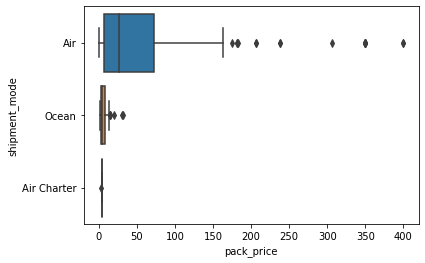

In [101]:
import seaborn as sns
# Boxplot of shipment_mode vs. pack_price
sns.boxplot(x= "pack_price", y= "shipment_mode", data = late_shipments)
plt.show()

####**Réalisation d'un test ANOVA**

+ Les diagrammes en boîte donnent l'impression que la distribution du prix du colis est différente pour chacun des trois modes d'expédition. 

+ Cependant, ils ne nous ont pas permis de savoir si le prix moyen du colis était différent dans chaque catégorie. Pour le déterminer, nous pouvons utiliser un test ANOVA. 

+ Les hypothèses nulles et alternatives peuvent être écrites comme suit.

  + $H_{0}$ : Les prix des paquets pour chaque catégorie de mode d'expédition sont les mêmes.

  + $H_{A}$ : Les prix des emballages pour certaines catégories de mode d'expédition sont différents.

*Utilisez un niveau de signification de 0,1.*

*late_shipments est disponible et pingouin a été chargé.*

####**Instructions** 
+ 1) 
  + Exécutez une ANOVA sur **late_shipments** en enquêtant sur **'pack_price'** (la variable dépendante) entre les groupes de **'shipment_mode'**.

+ 2) Question :

  + *En supposant un niveau de signification de 0,1, devez-vous rejeter l'hypothèse nulle selon laquelle il n'y a pas de différence dans les prix des colis entre les modes d'expédition ?*

####**Réponses possibles**

+ Oui. La valeur $p$ est supérieure ou égale au seuil de signification, l'hypothèse nulle doit donc être rejetée.

+ ***Oui. La valeur $p$ est inférieure ou égale au niveau de signification, l'hypothèse nulle doit donc être rejetée.***

+ Non. La valeur $p$ est supérieure ou égale au niveau de signification, l'hypothèse nulle ne doit donc pas être rejetée.

+ Non. La valeur $p$ est inférieure ou égale au niveau de signification, l'hypothèse nulle ne doit donc pas être rejetée.

In [102]:
# Run an ANOVA for pack_price across shipment_mode
anova_results = pingouin.anova(data=late_shipments,
                                dv='pack_price',
                                between='shipment_mode')



# Print anova_results
print(anova_results)

          Source  ddof1  ddof2        F         p-unc       np2
0  shipment_mode      2    997  21.8646  5.089479e-10  0.042018


####**Tests $t$ par paires**


+ Le test ANOVA ne permet pas de savoir quelles catégories de mode d'expédition présentent des différences significatives en termes de prix des colis. 

+ Pour identifier précisément les catégories présentant des différences, vous pouvez utiliser des tests t par paire.

*late_shipments est disponible et pingouin a été chargé.*

####**Instructions**

+ 1) 
  + Effectuez des tests $t$ par paire sur la variable **pack_price** de **late_shipments**, groupée par **shipment_mode**, sans faire aucun ajustement de la valeur $p$.

+ 2) 
  + Modifiez les tests $t$ par paire pour utiliser l'ajustement de la valeur $p$ de **Bonferroni**.

+ 3) 

####**Question :**

+ *En utilisant les résultats de la correction de Bonferroni et en supposant un niveau de signification de 0,1, pour quelles paires de modes d'expédition devez-vous rejeter l'hypothèse nulle selon laquelle les prix des emballages sont égaux ?*

####**Réponses possibles**

+ ***" Océan " et " Air Charter " ; " Océan " et " Air " ; " Air Charter " et " Air ".***

+ "Océan et Air, ainsi que Air Charter et Air.

+ "Océan" et "Air" seulement.

+ "Océan et Air Charter seulement.

In [103]:
# Perform a pairwise t-test on pack price, grouped by shipment mode
pairwise_results = pingouin.pairwise_tests(data = late_shipments,
dv = "pack_price", between = "shipment_mode", padjust = None)




# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.179625   
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc       BF10    hedges  
0  600.685682   two-sided  8.748346e-75  5.809e+76  0.726592  
1  986.979785   two-sided  6.934555e-71  1.129e+67  0.711119  
2   35.615026   two-sided  3.123012e-03     15.277 -0.423775  


In [104]:
# Modify the pairwise t-tests to use Bonferroni p-value adjustment
pairwise_results = pingouin.pairwise_tests(data=late_shipments, 
                                           dv="pack_price",
                                           between="shipment_mode",
                                           padjust="bonf")

# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.179625   
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc        p-corr p-adjust       BF10  \
0  600.685682   two-sided  8.748346e-75  2.624504e-74     bonf  5.809e+76   
1  986.979785   two-sided  6.934555e-71  2.080367e-70     bonf  1.129e+67   
2   35.615026   two-sided  3.123012e-03  9.369037e-03     bonf     15.277   

     hedges  
0  0.726592  
1  0.711119  
2 -0.423775  


###**Tests de proportion d’un échantillon**

####**1. Tests de proportion d’un échantillon**

+ Revenons à la réflexion sur ***les proportions de test***, comme nous l’avons fait au chapitre 1.

####**2. Récapitulatif du chapitre 1**

+ ***Les tests d’hypothèse du chapitre 1 ont mesuré si une proportion inconnue de la population était égale ou non à une certaine valeur.*** 

+ ***Nous avons utilisé le bootstrapping sur l’échantillon pour estimer l’erreur-type de la statistique de l’échantillon.*** 

+ ***L’erreur type a ensuite été utilisée pour calculer une statistique de test standardisée, le score $z$, qui a été utilisé pour obtenir une valeur de $p$, afin que nous puissions décider de rejeter ou non l’hypothèse nulle.*** 

+ ***Une distribution bootstrap peut être intensive en calcul à calculer, donc cette fois, nous allons plutôt calculer la statistique de test sans elle.***

####**3. Statistiques d’essai normalisées pour les proportions**

+ ***Un paramètre de population inconnu qui est une proportion, ou une proportion de population en abrégé, est noté p.*** 

+ La proportion de l’échantillon est notée p-hat ou $\hat{p}$, et la valeur hypothétique de la proportion de population est notée p-zéro ou p_0. 

+ Comme dans le chapitre 1, la statistique du test standardisé est un score $z$. 

+ Nous le calculons en commençant par la statistique de l’échantillon, en soustrayant sa moyenne, puis en divisant par son erreur-type. 

+ $\hat{p}$ ou p-hat moins la moyenne de $\hat{p}$ ou $p$-hat, divisée par l’erreur-type de $\hat{p}$ ou $p$-hat. 

+ Rappelez-vous de Sampling in Python que la moyenne d’une distribution d’échantillonnage des moyennes d’échantillon, notée $p$-hat, est $p$, la proportion de population. 

+ Dans l’hypothèse nulle, la proportion inconnue $p$ est supposée être la proportion de population hypothétique $p$-zéro. 

+ Le score $z$ est maintenant $p$-hat moins $p$-zéro, divisé par l’erreur type de $p$-hat.

####**4. Simplification du calcul de l’erreur-type**

+ Pour les proportions, sous H-nught, l’erreur type de l’équation $\hat{p}$ ou p-hat peut être simplifiée à p-zéro ou p_0 fois un moins p-zéro ou p_0, divisée par le nombre d’observations, puis enracinée au carré. 

+ Nous pouvons substituer cela dans notre équation pour le $z$-score. 

+ Ceci est plus facile à calculer car il n’utilise que $p$-hat et $n$, que nous obtenons de l’échantillon, et $p$-zero, que nous avons choisi.

####**5. Pourquoi $z$ au lieu de $t$ ?**


+ Nous pourrions nous demander pourquoi nous avons utilisé une distribution $z$ ici, mais une distribution $t$ au chapitre 2. 

+ Il s’agit de l’équation statistique de test pour le cas moyen à deux échantillons. 

+ L’écart type de l’échantillon, $s$, est calculé à partir de la moyenne de l’échantillon, x-bar ou $\bar{x}$. 

+ Cela signifie que la barre x ou $\bar{x}$ est utilisée dans le numérateur pour estimer la moyenne de la population et dans le dénominateur pour estimer l’écart-type de la population. 

+ Ce double usage augmente l’incertitude dans notre estimation du paramètre population. 


+ Puisque les distributions $t$ sont effectivement une distribution normale avec des queues plus grosses, nous pouvons les utiliser pour tenir compte de cette incertitude supplémentaire. 

+ En effet, la distribution $t$ fournit une mise en garde supplémentaire contre le rejet erroné de l’hypothèse nulle. 

+ Pour les proportions, nous n’utilisons que p-hat ou $\hat{p}$ dans le numérateur, évitant ainsi le problème de l’incertitude, et une distribution $z$ est très bien.

####**6. Catégories d’âge de débordement de pile**

+ Pour en revenir à l’enquête Stack Overflow, supposons que la moitié des utilisateurs de la population ont moins de trente ans et vérifions une différence. 

+ Fixons un niveau de signification de point zéro-un. 

+ Dans l’échantillon, un peu plus de la moitié des utilisateurs ont moins de trente ans.

####**7. Variables pour $z$**


+ Obtenons les chiffres nécessaires pour le $z$-score. 

+ $p$-hat ou $\hat{p}$ est la proportion de lignes d’échantillons où age_cat est égal à moins de trente. 

+ $p$-zéro est le point cinq selon l’hypothèse nulle. 

+ $n$ est le nombre de lignes dans le jeu de données.

####**8. Calcul du $z$-score**


+ L’insertion des valeurs que nous avons calculées dans l’équation du score $z$ donne un score $z$ d’environ trois points quatre.

####**9. Calcul de la valeur de $p$**


+ Pour les hypothèses alternatives à gauche , nous transformons le $z$-score en une valeur de $p$ en utilisant **norm.cdf**. 

+ Pour les hypothèses alternatives à droite de un, nous soustrayons le résultat **norm.cdf** de un. 

+ Pour les hypothèses alternatives bilatérales, nous vérifions si la statistique du test se situe dans l’une ou l’autre queue, de sorte que la valeur de $p$ est la somme de ces deux valeurs: l
  + l’une correspondant au score $z$ et l’autre à son négatif de l’autre côté de la distribution. 
  + Étant donné que la distribution normale PDF est symétrique, cela simplifie à deux fois la valeur $p$ droite puisque le $z$-score est positif. 
  
+ Ici, la valeur de $p$ est inférieure au niveau de signification du point zéro-un, nous rejetons donc l’hypothèse nulle, concluant que la proportion d’utilisateurs de moins de trente ans n’est pas égale au point cinq.

####**10. Entraînons-nous!**
+ Prenons un exemple.

###**EXERCICE**

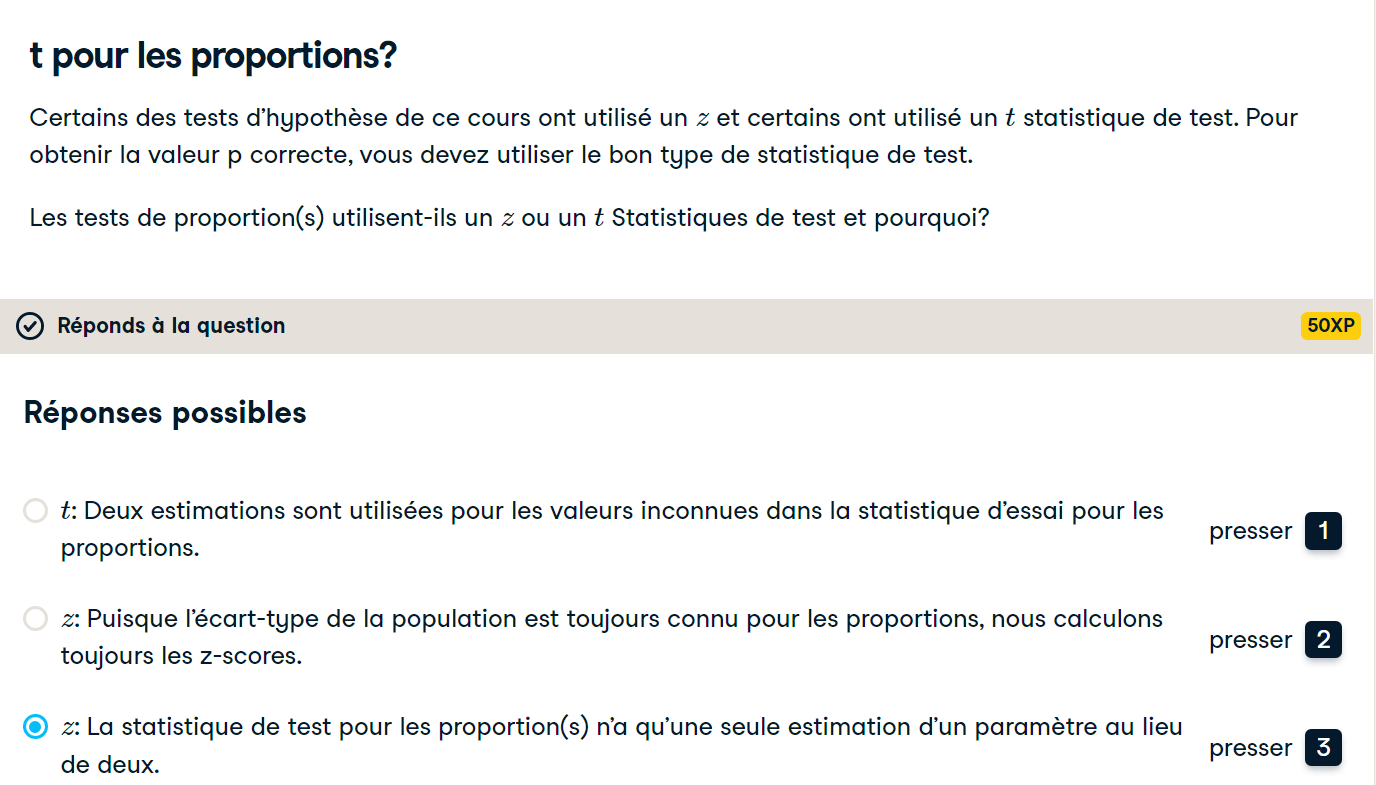
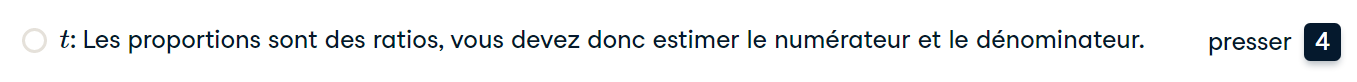

####**Test des proportions uniques**

+ Au chapitre 1, vous avez calculé une valeur $p$ pour un test supposant que la proportion d'expéditions tardives était supérieure à 6 %. 

+ Dans ce chapitre, vous avez utilisé ***une distribution bootstrap pour estimer l'erreur standard de la statistique.*** 

+ ***Une autre solution consiste à utiliser une équation pour l'erreur standard basée sur la proportion de l'échantillon, la proportion supposée et la taille de l'échantillon.***

+ *Vous allez revoir la valeur $p$ en utilisant ce calcul plus simple.*

$$
z = \dfrac{\hat{p} - p_{0}}{\sqrt{\dfrac{p_{0}*(1-p_{0})}{n}}}
$$

+ *late_shipments est disponible. pandas et numpy sont disponibles sous leurs alias habituels, et norm est chargé depuis scipy.stats.*

####**Instructions** 
+ Hypothèse que la proportion d'expéditions tardives est de 6%.

+ Calculez la proportion de l'échantillon des expéditions où le retard est égal à "Oui".

+ Calculez le nombre d'observations dans l'échantillon.

+ Calculez le numérateur et le dénominateur du score $z$.

+ Calculez le score $z$ comme le rapport de ces nombres.

+ Transformez le score $z$ en une valeur $p$, en vous rappelant qu'il s'agit d'une hypothèse alternative "supérieure à".

In [105]:
# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (late_shipments["late"] == "Yes").mean()

# Calculate the sample size
n = len(late_shipments)

# Print p_hat and n
print(p_hat, n)

0.061 1000


In [106]:
# Calculate the numerator and denominator of the test statistic
numerator = p_hat - p_0
denominator = np.sqrt(p_0*(1-p_0)/n)

# Calculate the test statistic
z_score = numerator/denominator

# Print the result
print(z_score)

0.13315591032282698


In [107]:
# Calculate the test statistic
z_score = numerator / denominator

# Calculate the p-value from the z-score
p_value = 1 - norm.cdf(z_score)

# Print the p-value
print(p_value)

0.44703503936503364


###**Tests de proportion à deux échantillons**

####**1. Tests de proportion à deux échantillons**

*Excellent travail jusqu’à présent! Dans la leçon précédente, nous avons testé une seule proportion par rapport à une valeur spécifique. Comme pour les moyennes, nous pouvons également tester les différences entre les proportions dans deux populations.*

####**2. Comparaison de deux proportions**

+ L’enquête Stack Overflow contient une variable amateur. 

+ La valeur « Oui » signifie que l’utilisateur se décrit comme un amateur et « Non » signifie qu’il se décrit comme un professionnel. 

+ Nous pouvons émettre l’hypothèse que la proportion d’utilisateurs amateurs est la même pour la catégorie d’âge des moins de trente ans que pour la catégorie des trente ans et plus, ce qui est un test bilatéral. 

+ Plus formellement, l’hypothèse nulle est que la différence entre les paramètres de population pour chaque groupe est nulle. 

+ Fixons un niveau de signification de point zéro-cinq.

####**3. Calcul du $z$-score**
+ Voici l’équation $z$-score pour un test de proportion. Décomposons-le. 

+ La statistique de l’échantillon est la différence dans les proportions pour chaque catégorie. 

+ Ce sont les deux valeurs $p$-hat ou $\hat{p}$ dans le numérateur. 

+ Nous soustrayons la valeur hypothétique du paramètre population, et en supposant que l’hypothèse nulle est vraie, elle est nulle. 

+ Le dénominateur est l’erreur-type de la statistique de l’échantillon. 

+ Nous pouvons à nouveau éviter d’avoir à générer une distribution bootstrap pour calculer l’erreur type en utilisant une équation d’erreur type, qui est une version légèrement plus compliquée du cas d’échantillon. 

+ Il convient de noter que p-hat ou $\hat{p}$  est une moyenne pondérée des proportions de l’échantillon pour chaque catégorie, également connue sous le nom d’estimation groupée de la proportion de la population. $\hat{p}$  ou p-hat peut être calculé à l’aide de l’équation suivante. 

+ Cela semble horrible, mais Python est excellent pour gérer l’arithmétique. 

+ Nous n’avons maintenant besoin que de quatre chiffres de l’ensemble de données de l’échantillon pour effectuer ces calculs et calculer le score $z$: 
  + la proportion d’amateurs dans chaque groupe d’âge et le nombre d’observations dans chaque groupe d’âge.

####**4. Obtenir les chiffres pour le $z$-score**


+ Pour calculer ces quatre nombres, nous regroupons par catégorie d’âge et calculons les proportions de l’échantillon à l’aide de **.value_counts**, et les nombres de lignes à l’aide de **.count**. 

+ Comme nous examinons la proportion d’amateurs, nous nous concentrerons uniquement sur les rangées où l’amateur est Oui.

####**5. Obtenir les chiffres pour le $z$-score**


+ Pour isoler les proportions d’amateurs de $p$_hats, nous pouvons utiliser le sous-ensemble multiIndex de pandas, en passant un tuple des valeurs de la colonne externe et de la colonne intérieure. 

+ Cela donne une proportion d’échantillon de point 77 pour le groupe d’au moins trente et de point 84 pour les moins de trente ans.

####**6. Obtenir les chiffres pour le $z$-score**


+ Le nombre d’observations dans chaque catégorie d’âge peut être extrait avec un sous-ensemble plus simple des pandas. 

+ Il y a 1050 rangées dans le groupe d’au moins trente et 1211 pour le groupe des moins de 30 ans.

####**7. Obtenir les chiffres pour le $z$-score**


+ Après cela, nous pouvons faire l’arithmétique en utilisant nos équations pour $p$_hat ou $\hat{p}$ , l’erreur type et le score $z$ pour obtenir la statistique du test. 

+ Cela renvoie un score $z$ de moins quatre points-deux-deux. Heureusement, nous pouvons éviter une grande partie de cette arithmétique.

####**8. Tests de proportion à l’aide de proportions_ztest()**

+ ***La fonction proportions_ztest de statsmodels peut calculer le z-score plus directement***. 

+ Cette fonction nécessite deux objets en tant que tableaux NumPy : 
  + le nombre d’amateurs dans chaque groupe d’âge et le nombre total de lignes dans chaque groupe d’âge. 
  
+ Nous pouvons obtenir ces numéros en regroupant par age_cat et en appelant ***point-value_counts*** sur la colonne amateur, comme indiqué ci-dessus. 

+ Les nombres peuvent ensuite être lus ou sous-définis pour créer les tableaux. 

+ Ensuite, nous importons **proportions_ztest** à partir de ***statsmodels-dot-stats-dot-proportions**, et passons les tableaux aux arguments **count et nobs**. 

+ Étant donné que nous testons une différence, nous spécifions qu’il s’agit d’un test bilatéral utilisant l’argument alternatif. **proportions_ztest** renvoie **un score $z$ et une valeur $p$**. 

+ La valeur de $p$ est inférieure au seuil de signification de cinq pour cent que nous avons spécifié, nous pouvons donc conclure qu’il existe une différence dans la proportion d’amateurs entre les deux groupes d’âge.

####**9. Entraînons-nous!**
+ Il est temps d’effectuer vos propres tests de proportion.

###**EXERCICE**

####**Test de deux proportions**

+ Vous vous demandez peut-être si le montant payé pour le fret a une incidence sur le fait que l'envoi soit en retard ou non. 

+ Rappelez-vous que dans l'ensemble de données late_shipments, le fait que l'envoi soit en retard ou non est enregistré dans la colonne late. 

+ Les coûts de fret sont stockés dans la colonne freight_cost_group, et les catégories sont "cher" et "raisonnable".

+ Les hypothèses à tester, avec "late" correspondant à la proportion d'envois en retard pour ce groupe, sont les suivantes:

$$
late_{\text{expensive}} -  late_{\text{reasonable}} = 0
$$

$$
late_{\text{expensive}} -  late_{\text{reasonable}} > 0
$$

+ p_hats ou $\hat{p}$ contient les estimations des proportions de la population (proportions de l'échantillon) pour chaque groupe de coûts de transport :

      freight_cost_group  late
      expensive           Yes     0.082569
      reasonable          Yes     0.035165
      Name: late, dtype: float64

+ $ns$ contient les tailles d'échantillon pour ces groupes :

      freight_cost_group
      expensive     545
      reasonable    455
      Name: late, dtype: int64

+ **pandas et numpy** ont été importés sous leurs alias habituels, et **norm** est disponible depuis **scipy.stats**.

####**Instructions**

+ Calculez la proportion de l'échantillon groupé, à partir de p_hats ou $\hat{p}$ et $ns$.

$$
\hat{p} = \frac{n_{\text{expensive}} \times \hat{p}_{\text{expensive}} + n_{\text{reasonable}} \times \hat{p}_{\text{reasonable}}}{n_{\text{expensive}} + n_{\text{reasonable}}}
$$


In [170]:
late_shipments.columns

Index(['id', 'country', 'managed_by', 'fulfill_via', 'vendor_inco_term',
       'shipment_mode', 'late_delivery', 'late', 'product_group',
       'sub_classification', 'vendor', 'item_description',
       'molecule_test_type', 'brand', 'dosage', 'dosage_form',
       'unit_of_measure_per_pack', 'line_item_quantity', 'line_item_value',
       'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_kilograms', 'freight_cost_usd',
       'freight_cost_groups', 'line_item_insurance_usd'],
      dtype='object')

In [171]:
p_hats = late_shipments.groupby('freight_cost_groups')['late'].value_counts(normalize = True)

In [181]:
p_hats

freight_cost_groups  late
expensive            No      0.920904
                     Yes     0.079096
reasonable           No      0.964835
                     Yes     0.035165
Name: late, dtype: float64

In [182]:
p_hats_reasonable = p_hats[( "reasonable", "Yes")]
p_hats_expensive = p_hats[("expensive","Yes")]

In [183]:
print(p_hats_reasonable, p_hats_expensive)

0.035164835164835165 0.07909604519774012


In [184]:
ns = late_shipments.groupby('freight_cost_groups')['late'].count()
ns

freight_cost_groups
expensive     531
reasonable    455
Name: late, dtype: int64

In [177]:
ns["reasonable"]

455

In [185]:
# Calculate the pooled estimate of the population proportion
p_hat = (p_hats_reasonable  * ns["reasonable"] + p_hats_expensive * ns["expensive"]) / (ns["reasonable"] + ns["expensive"])

# Print the result
print(p_hat)

0.058823529411764705


2) 
+ Calculez l'erreur standard de l'échantillon en utilisant cette équation.

 $$
 \text{SE}(\hat{p}_{\text{expensive}} - \hat{p}_{\text{reasonable}}) = \sqrt{\dfrac{\hat{p} \times (1 - \hat{p})}{n_{\text{expensive}}} + \dfrac{\hat{p} \times (1 - \hat{p})}{n_{\text{reasonable}}}}
 $$
 

+ Calculez p_hat multiplié par (1 - p_hat).
+ Divisez p_hat_times_not_p_hat par le nombre de lignes "raisonnables" et par le nombre de lignes "chères", et additionnez ces deux valeurs.
+ Calculez la std_error en prenant la racine carrée de p_hat_times_not_p_hat_over_ns.

In [186]:
# Calculate the pooled estimate of the population proportion
p_hat = (p_hats_reasonable * ns["reasonable"] + p_hats_expensive * ns["expensive"]) / (ns["reasonable"] + ns["expensive"])

# Calculate p_hat one minus p_hat
p_hat_times_not_p_hat = p_hat * (1 - p_hat)

# Divide this by each of the sample sizes and then sum
p_hat_times_not_p_hat_over_ns = p_hat_times_not_p_hat / ns["expensive"] + p_hat_times_not_p_hat / ns["reasonable"]

# Calculate the standard error
std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)

# Print the result
print(std_error)

0.015031300895066685


3)
  + Calculez le $z$-score en utilisant l'équation suivante.

  $$
  z = \frac{(\hat{p}_{\text{expensive}} - \hat{p}_{\text{reasonable}})}{\text{SE}(\hat{p}_{\text{expensive}} - \hat{p}_{\text{reasonable}})}
  $$

In [187]:
# Calculate the pooled estimate of the population proportion
p_hat = (p_hats_reasonable * ns["reasonable"] + p_hats_expensive * ns["expensive"]) / (ns["reasonable"] + ns["expensive"])

# Calculate p_hat one minus p_hat
p_hat_times_not_p_hat = p_hat * (1 - p_hat)

# Divide this by each of the sample sizes and then sum
p_hat_times_not_p_hat_over_ns = p_hat_times_not_p_hat / ns["expensive"] + p_hat_times_not_p_hat / ns["reasonable"]

# Calculate the standard error
std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)

# Calculate the z-score
z_score = (p_hats_expensive - p_hats_reasonable) / std_error

# Print z_score
print(z_score)

2.922648567784529


+ 4)
  + Calculez la valeur p à partir du z-score.

In [188]:
# Calculate the pooled estimate of the population proportion
p_hat = (p_hats_reasonable * ns["reasonable"] + p_hats_expensive * ns["expensive"]) / (ns["reasonable"] + ns["expensive"])

# Calculate p_hat one minus p_hat
p_hat_times_not_p_hat = p_hat * (1 - p_hat)

# Divide this by each of the sample sizes and then sum
p_hat_times_not_p_hat_over_ns = p_hat_times_not_p_hat / ns["expensive"] + p_hat_times_not_p_hat / ns["reasonable"]

# Calculate the standard error
std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)

# Calculate the z-score
z_score = (p_hats_expensive - p_hats_reasonable) / std_error

# Calculate the p-value from the z-score
p_value = 1 - norm.cdf(z_score)

# Print p_value
print(p_value)

0.0017353400023595311


####**proportions_ztest() pour deux échantillons**

+ Le calcul de la valeur $p$ a demandé beaucoup d'efforts. 

+ Bien qu'il soit utile de voir comment les calculs fonctionnent, il n'est pas pratique de le faire dans les analyses du monde réel. Pour une utilisation quotidienne, il est préférable d'utiliser le paquet statsmodels.

+ Rappelons les hypothèses.

$$
late_{\text{expensive}} -  late_{\text{reasonable}} = 0
$$

$$
late_{\text{expensive}} -  late_{\text{reasonable}} > 0
$$

*late_shipments est disponible, contenant la colonne freight_cost_group. numpy et pandas ont été chargés sous leurs alias standards, et proportions_ztest a été chargé depuis statsmodels.stats.proportion.*

####**Instructions** 

+ 1) 
  + Obtenir les comptes de la colonne late groupés par freight_cost_group.

+ 2) 
  + Extraire le nombre de "Oui" pour les deux groupes de coûts de transport dans un tableau numpy, en spécifiant le compte "cher" et ensuite "raisonnable".

  + Déterminer le nombre total de lignes dans chaque groupe de coûts de transport dans un tableau numpy, en spécifiant le compte "cher" et ensuite "raisonnable".

  + Exécutez un test $z$ en utilisant **proportions_ztest()**, en spécifiant l'alternative comme "plus grande".

In [ ]:
late_shipments.columns

In [189]:
from statsmodels.stats.proportion import proportions_ztest

In [192]:
# Count the late column values for each freight_cost_group
late_by_freight_cost_group = late_shipments.groupby("freight_cost_groups")["late"].value_counts()

# Print the counts
print(late_by_freight_cost_group)

freight_cost_groups  late
expensive            No      489
                     Yes      42
reasonable           No      439
                     Yes      16
Name: late, dtype: int64


In [194]:
# Count the late column values for each freight_cost_group
late_by_freight_cost_group = late_shipments.groupby("freight_cost_groups")['late'].value_counts()

# Create an array of the "Yes" counts for each freight_cost_group
success_counts = np.array([42, 16])

# Create an array of the total number of rows in each freight_cost_group
n = np.array([42 + 489, 16 + 439])

# Run a z-test on the two proportions
stat, p_value = proportions_ztest(count=success_counts, nobs=n,
                                  alternative="larger")

# Print the results
print(stat, p_value)

2.922648567784529 0.001735340002359578


###**Test du chi carré de l’indépendance**


####**1. Test du chi carré de l’indépendance**

+ Tout comme ***l’ANOVA étend les tests $t$ à plus de deux groupes, les tests du chi carré d’indépendance étendent les tests de proportion à plus de deux groupes.***

####**2. Revoir le critère de proportion**

+ Voici le test des proportions de la dernière vidéo.

+  La statistique du test est le score $z$ de moins quatre points-deux-deux.

####**3. Indépendance des variables**
+ Ce test de proportion a donné un résultat positif. 

+ La petite valeur de $p$ suggérait qu’il y avait des preuves que les variables amateur et catégorie d’âge avaient une association. 

+ Si la proportion d’amateurs était la même pour chaque catégorie d’âge, les variables seraient considérées comme statistiquement indépendantes. 

+ Plus formellement, deux variables catégorielles sont considérées comme statistiquement indépendantes lorsque la proportion de réussites dans la variable de réponse est la même dans toutes les catégories de la variable explicative.

####**4. Test d’indépendance des variables**

+ **Le paquet pingouin** a un moyen indirect de tester la différence dans les proportions de la vidéo précédente. 

+ **À la méthode chi2_independence**, nous passons stack_overflow comme données, amateur comme $x$ et age_cat comme $y$. 

+ L’argument de correction spécifie s’il faut ou non appliquer la correction de continuité de Yates, qui est un facteur de fudge lorsque la taille de l’échantillon est très petite et que les degrés de liberté sont de un. Puisque chaque groupe a plus d’une centaine d’observations, nous n’en avons pas besoin ici. 

+ La méthode renvoie trois DataFrames pandas différents : 
  + **les comptages attendus, les nombres observés et les statistiques liées au test**. 
  
+ Regardons les statistiques et concentrons-nous sur la ligne de test Pearson et les colonnes chi2 et pval. 

+ La valeur de $p$ est la même que celle que nous avions avec le test $z$ d’environ deux sur cent mille. La valeur chi2 est le résultat carré de notre $z$-score vu dans la vidéo précédente.

####**5. Satisfaction au travail et catégorie d’âge**

+ Essayons un autre exemple. Rappelons que l’échantillon Stack Overflow comporte une variable de catégorie d’âge avec deux catégories et une variable de satisfaction au travail avec cinq catégories.

####**6. Déclarer les hypothèses**


+ Nous pouvons émettre des hypothèses pour tester l’indépendance de ces variables. 

+ Ici, la catégorie d’âge est la variable de réponse et la satisfaction au travail est la variable explicative. 

+ L’hypothèse nulle est que l’indépendance se produit. 

+ Utilisons un niveau de signification du premier point. 

+ La statistique de test est notée chi carré. 

+ Il quantifie la distance entre les résultats observés et les valeurs attendues si l’indépendance était vraie.

####**7. Visualisation exploratoire : diagramme proportionnel à barres empilées**

+ Explorons les données à l’aide d’un diagramme proportionnel à barres empilées. 

+ Nous commençons par calculer les proportions dans chaque groupe d’âge. 

+ ***Ensuite, nous utilisons la méthode unstack pour convertir ce tableau en format large***. 

+ L’utilisation de la méthode plot et la définition de kind sur bar et stacked sur True produisent un tracé à barres empilées proportionnel.

####**8. Visualisation exploratoire : diagramme proportionnel à barres empilées**

+ ***Si la catégorie d’âge était indépendante de la satisfaction au travail, la répartition entre les catégories d’âge serait à la même hauteur dans chacune des cinq barres.*** 

+ Il y a une certaine variation ici, mais nous aurons besoin d’un test d’indépendance du chi carré pour déterminer s’il s’agit d’une différence significative.

####**9. Test d’indépendance du chi carré**


+ Utilisons à nouveau le test d’indépendance du chi carré de pingouin. 

+ Nous avons stack_overflow comme données et job_sat et age_cat comme $x$ et $y$. 

+ Nous laissons de côté une correction ici puisque notre degré de liberté est de quatre, calculé en soustrayant un de chacune des catégories de variables et en multipliant. 

+ La valeur de $p$ est le point deux-trois, ce qui est supérieur au seuil de signification que nous avons fixé, de sorte que nous concluons que les catégories d’âge sont indépendantes de la satisfaction au travail.

####**10. Échanger les variables?**
+ En échangeant les variables, la catégorie d’âge est la réponse et la satisfaction au travail est la variable explicative,

####**11. Échanger les variables?**
+ Nous voyons que les divisions pour chaque barre sont à des endroits similaires.

####**12. Chi-carré dans les deux sens**

+ Si nous exécutons le test du chi carré avec les variables échangées, les résultats sont identiques. 

+ Pour cette raison, nous formulons nos questions comme « les variables $X$ et $Y$ sont-elles indépendantes? », plutôt que « la variable $X$ est-elle indépendante de la variable $Y$? », puisque l’ordre n’a pas d’importance.

####**13. Qu’en est-il de la direction et des queues?**

+ Nous ne nous sommes pas inquiétés des queues dans ce test, et en fait, ***la méthode chi2_independence n’a pas d’argument alternatif***. 

+ En effet, la statistique du test du chi carré est basée sur le carré des comptes observés et attendus, et les nombres carrés ne sont pas négatifs. 

+ Cela signifie que les tests du chi carré ont tendance à être des tests à queue droite.

  + Les tests du chi carré à queue gauche sont utilisés en criminalistique statistique pour détecter si un ajustement est suspectement bon parce que les données ont été fabriquées. Les tests de variance du chi carré peuvent être bilatéraux. Ce sont des utilisations de niche, cependant.

####**14. Entraînons-nous!**
+ Il est temps de pratiquer!

###**EXERCICE**

####**La distribution du chi-deux**

+ ***Les tests d'hypothèse du chi-deux reposent sur la distribution du chi-deux. Comme la distribution $t$, elle possède des degrés de liberté et des paramètres de non centralité.***

+ ***Les graphiques montrent le PDF et le CDF d'une distribution du chi-deux (ligne noire pleine) et, à titre de comparaison, une distribution normale avec la même moyenne et la même variance (ligne pointillée grise).***

*Quelle affirmation concernant la distribution du chi-deux est vraie ?*

####**Instructions**


+ Comme la distribution normale, la distribution du chi-deux est définie pour des valeurs de $x$ allant de moins l'infini à l'infini.

+ ***Lorsque vous augmentez les degrés de liberté ou la non centralité, les courbes PDF et CDF de la distribution du chi carré se rapprochent de celles d'une distribution normale.***

+ Lorsque vous diminuez les degrés de liberté ou la non centralité, les courbes PDF et CDF de la distribution du chi carré se rapprochent de celles d'une distribution normale.

+ La distribution du chi-deux PDF est symétrique par rapport à son pic.

####**Combien de queues pour les tests de chi-deux ?**

+ ***Contrairement à pingouin.ttest() et statsmodels.stats.proportion.proportions_ztest(), pingouin.chi2_independence() n'a pas d'argument alternatif pour spécifier quelles queues sont considérées par l'hypothèse alternative.***

*Quelle queue est presque toujours prise en compte dans les tests du chi-deux ?*

####**Répondez à la question**

####**Réponses possibles**

+ Queue gauche

+ ***Queue droite***

+ Double queue

+ Ni l'un ni l'autre : les tests de chi-deux dépendent du pic, pas des queues

+ Cela dépend du problème

####**Réalisation d'un test de chi-deux**


+ ***Le test d'indépendance du chi-deux compare les proportions de succès d'une variable catégorielle parmi les catégories d'une autre variable catégorielle.***

+ Les accords commerciaux utilisent souvent une forme de sténographie commerciale afin de spécifier les détails exacts de leur contrat. Il s'agit des termes commerciaux internationaux de la Chambre de commerce internationale (CCI), ou incoterms en abrégé.

+ L'ensemble de données late_shipments comprend un vendor_inco_term qui décrit les incoterms qui s'appliquent à une expédition donnée. Les choix sont les suivants :

  + **EXW** : "Ex works". L'acheteur paie pour le transport des marchandises.
  + **CIP** : "Carriage and insurance paid to". Le vendeur paie le transport et l'assurance jusqu'à ce que les marchandises montent à bord d'un navire.
  + **DDP** : "Delivered duty paid". Le vendeur paie le transport de la marchandise jusqu'à ce qu'elle atteigne un port de destination.
  + **FCA** : "Free carrier". Le vendeur paie le transport de la marchandise.


+ *Il est possible que les incoterms influent sur le fait que les coûts de transport soient élevés ou non. Testez ces hypothèses avec un niveau de signification de 0,01.*

  + $H_{0}$ : vendor_inco_term et freight_cost_group sont indépendants.

  + $H_{A}$ : vendor_inco_term et freight_cost_group sont associés.

*late_shipments est disponible, et les éléments suivants ont été chargés : matplotlib.pyplot as plt, pandas as pd, et pingouin.*

####**Instructions** 

+ Calculez la proportion de groupe_coût_fret dans les expéditions tardives regroupées par vendor_inco_term.


+ Dépilez le résultat de .value_counts() pour qu'il soit au format large au lieu du long.


+ Créez un diagramme à barres empilées proportionnel avec des barres remplies en fonction du groupe de coûts de fret à travers les niveaux de vendor_inco_term.


+ Effectuez un test d'indépendance de type chi carré sur le groupe_coût du fret et le paramètre vendor_inco_term dans l'ensemble de données late_shipments.


#####**Question**
+ *Que devez-vous conclure du test d'hypothèse ?*

####**Réponses possibles**

+ Ne pas rejeter l'hypothèse nulle et conclure que vendor_inco_term et freight_cost_group sont indépendants.

+ Rejeter l'hypothèse nulle et conclure que vendor_inco_term et freight_cost_group sont indépendants.

+ Ne pas rejeter l'hypothèse nulle et conclure que vendor_inco_term et freight_cost_group sont associés.

+ ***Rejeter l'hypothèse nulle et conclure que vendor_inco_term et freight_cost_group sont associés.***

In [219]:
# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments.groupby("vendor_inco_term")["freight_cost_groups"].value_counts(normalize = True)

# Print props
print(props)

vendor_inco_term  freight_cost_groups
CIP               reasonable             0.680000
                  expensive              0.320000
DDP               expensive              0.550000
                  reasonable             0.450000
DDU               reasonable             1.000000
EXW               expensive              0.583448
                  reasonable             0.416552
FCA               reasonable             0.663636
                  expensive              0.336364
Name: freight_cost_groups, dtype: float64


In [220]:
# Convert props to wide format
wide_props = props.unstack()

# Print wide_props
print(wide_props)

freight_cost_groups  expensive  reasonable
vendor_inco_term                          
CIP                   0.320000    0.680000
DDP                   0.550000    0.450000
DDU                        NaN    1.000000
EXW                   0.583448    0.416552
FCA                   0.336364    0.663636


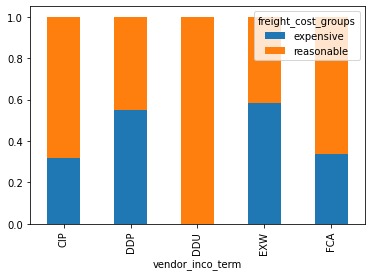

In [221]:
# Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term
wide_props.plot(kind="bar", stacked=True)
plt.show()

In [207]:
import pingouin 
late_shipments.columns

Index(['id', 'country', 'managed_by', 'fulfill_via', 'vendor_inco_term',
       'shipment_mode', 'late_delivery', 'late', 'product_group',
       'sub_classification', 'vendor', 'item_description',
       'molecule_test_type', 'brand', 'dosage', 'dosage_form',
       'unit_of_measure_per_pack', 'line_item_quantity', 'line_item_value',
       'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_kilograms', 'freight_cost_usd',
       'freight_cost_groups', 'line_item_insurance_usd'],
      dtype='object')

In [222]:
# Determine if freight_cost_group and vendor_inco_term are independent
expected, observed, stats = pingouin.chi2_independence(data=late_shipments, 
                                                       x='freight_cost_groups', 
                                                       y='vendor_inco_term')

# Print results
stats[stats['test'] == 'pearson']

/usr/local/lib/python3.8/dist-packages/pingouin/contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
/usr/local/lib/python3.8/dist-packages/pingouin/contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:6716: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:6716: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:6713: RuntimeWarning: divide by zero encountered in true_divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.0,34.805072,4.0,5.093922e-07,0.186561,0.999235


###**Tests de qualité du chi carré des tests d’ajustement**

####**1. Tests de qualité du chi carré des tests d’ajustement**

+ ***La dernière fois, nous avons utilisé un test du chi carré pour comparer les proportions dans deux variables catégorielles. Cette fois, nous utiliserons une autre variante du test du chi carré pour comparer une seule variable catégorielle à une distribution hypothétique.***

####**2. Liens violets**

+ L’enquête Stack Overflow contient une question amusante sur ce que ressentent les utilisateurs lorsqu’ils découvrent qu’ils ont déjà visité la ressource principale, également appelée lien violet, lorsqu’ils tentent de résoudre un problème de codage. 

+ Nous pouvons utiliser la méthode point-valeur-comptage pour obtenir les comptes de chaque groupe dans la colonne purple_link. 

+ Nous faisons également un peu de manipulation ici pour obtenir un DataFrame bien structuré avec lequel nous pourrons travailler plus tard. 

+ Tout d’abord, nous renommons la colonne la plus à gauche pour être purple_link, affectons les comptes à $n$ et enfin trions par **purple_link**, de sorte que les réponses sont dans l’ordre alphabétique. 

+ Il y a quatre réponses possibles stockées dans la colonne purple_link.

####**3. Déclarer les hypothèses**

+ Supposons que la moitié des utilisateurs de la population répondraient « Bonjour, vieil ami », et les trois autres réponses obtiendraient un sixième chacune. 

+ Nous pouvons créer un DataFrame pour ces résultats hypothétiques à partir d’un dictionnaire de paires clé-valeur pour chaque réponse. 

+ Nous spécifions les hypothèses selon lesquelles l’échantillon correspond ou non à cette distribution hypothétisée. 

+ La statistique d’essai, du chi carré, mesure dans quelle mesure la distribution des proportions observée dans l’échantillon est éloignée de la distribution hypothétique. Définissons le niveau de signification du point zéro un.

####**4. Nombre hypothétique par catégorie**

+ Pour visualiser la distribution purple_link, il sera utile d’avoir les nombres hypothétiques pour chaque réponse, qui sont calculés en multipliant les proportions hypothétiques par le nombre total d’observations dans l’échantillon.

####**5. Visualisation des comptages**

+ Créons une visualisation pour voir dans quelle mesure les comptes hypothétiques semblent modéliser les comptes observés. 

+ La façon naturelle de visualiser les comptes d’une variable catégorielle est avec un diagramme à barres. 

+ Tout d’abord, nous utilisons plt-dot-bar pour tracer le nombre de purple_link observés, en définissant l’axe horizontal sur purple_link et l’axe vertical sur $n$. 

+ Nous définissons la couleur des barres et ajoutons une étiquette pour une légende. 

+ Nous faisons de même pour les comptes hypothétiques, mais nous ajoutons également de la transparence avec l’argument alpha.

####**6. Visualisation des comptages**


+ Nous pouvons voir que deux des réponses sont raisonnablement bien modélisées par la distribution hypothétique et deux autres semblent très différentes, mais nous devrons effectuer un test d’hypothèse pour voir si la différence est statistiquement significative.

####**7. Test de qualité de l’ajustement du chi carré**

+ Le test du chi carré à un échantillon est appelé test de qualité de l’ajustement, car nous testons dans quelle mesure nos données hypothétiques correspondent aux données observées. 

+ Pour exécuter le test, nous utilisons la méthode chisquare de scipy-dot-stats. 

+ Il y a deux arguments requis pour chicarrer : 
  + un objet de type tableau pour les comptages observés, f_obs, et un pour les comptes attendus, f_exp. 
  
+ La valeur de $p$ renvoyée par la fonction est très petite, beaucoup plus faible que le niveau de signification du point zéro-un, de sorte que nous concluons que la distribution des proportions de l’échantillon est différente de la distribution hypothétique.

####**8. Entraînons-nous!**
+ Effectuons quelques tests de qualité du chi carré de l’ajustement.

###**EXERCICE**

####**Visualisation de la qualité de l'ajustement**

+ ***Le test d'ajustement du chi carré compare les proportions de chaque niveau d'une variable catégorique aux valeurs hypothétiques. Avant d'exécuter un tel test, il peut être utile de comparer visuellement la distribution dans l'échantillon à la distribution hypothétique.***

+ Rappelez-vous les incoterms des fournisseurs dans l'ensemble de données late_shipments. Vous supposez que les quatre valeurs se produisent avec ces fréquences dans la population des expéditions.

  + CIP : 0.05
  + DDP : 0,1
  + EXW : 0,75
  + FCA : 0,1

+ Ces fréquences sont stockées dans le DataFrame hypothétique.

+ Le DataFrame incoterm_counts stocke les .value_counts() de la colonne vendor_inco_term.

+ late_shipments est disponible ; pandas et matplotlib.pyplot sont chargés avec leurs alias standards.

####**Instructions **
+ Trouver le nombre total de lignes dans late_shipments

+ Ajoutez une colonne nommée n au DataFrame hypothétique qui est la colonne prop hypothétique fois n_total.


+ Créez un graphique à barres de 'n' en fonction de 'vendor_inco_term' pour les données incoterm_counts, en spécifiant une couleur rouge.


+ Ajoutez des barres bleues au graphique montrant les mêmes résultats à partir du DataFrame hypothétique, en spécifiant un alpha de 0,5.

In [261]:
# Find the number of rows in late_shipments
n_total = len(late_shipments)

# Print n_total
print(n_total)

1000


In [241]:
late_shipments.columns

Index(['id', 'country', 'managed_by', 'fulfill_via', 'vendor_inco_term',
       'shipment_mode', 'late_delivery', 'late', 'product_group',
       'sub_classification', 'vendor', 'item_description',
       'molecule_test_type', 'brand', 'dosage', 'dosage_form',
       'unit_of_measure_per_pack', 'line_item_quantity', 'line_item_value',
       'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_kilograms', 'freight_cost_usd',
       'freight_cost_groups', 'line_item_insurance_usd'],
      dtype='object')

In [262]:
incoterm_counts = late_shipments['vendor_inco_term'].value_counts() 

In [263]:
incoterm_counts = incoterm_counts.rename_axis('vendor_inco_term')\
                                  .reset_index(name='n')\
                                  .sort_values('vendor_inco_term')

In [264]:
incoterm_counts

,vendor_inco_term,n
3,CIP,56
2,DDP,100
4,DDU,1
0,EXW,732
1,FCA,111


In [265]:
hypothesized = late_shipments['vendor_inco_term'].value_counts(normalize = True)

In [266]:

hypothesized= hypothesized.rename_axis('vendor_inco_term')\
                                  .reset_index(name='prop')\
                                  .sort_values('vendor_inco_term')

In [267]:
hypothesized

,vendor_inco_term,prop
3,CIP,0.056
2,DDP,0.100
4,DDU,0.001
0,EXW,0.732
1,FCA,0.111


In [268]:
# Create n column that is prop column * n_total
hypothesized["n"] = hypothesized["prop"] * n_total

# Print the modified hypothesized DataFrame
print(hypothesized)

  vendor_inco_term   prop      n
3              CIP  0.056   56.0
2              DDP  0.100  100.0
4              DDU  0.001    1.0
0              EXW  0.732  732.0
1              FCA  0.111  111.0


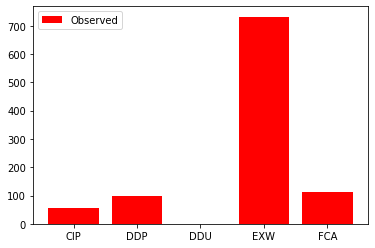

In [269]:
# Plot a red bar graph of n vs. vendor_inco_term for incoterm_counts
plt.bar(incoterm_counts['vendor_inco_term'], incoterm_counts['n'], color="red", label="Observed")
plt.legend()
plt.show()

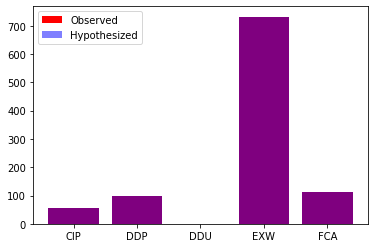

In [270]:
# Find the number of rows in late_shipments
n_total = len(late_shipments)

# Create n column that is prop column * n_total
hypothesized["n"] = hypothesized["prop"] * n_total

plt.figure()
# Plot a red bar graph of n vs. vendor_inco_term for incoterm_counts
plt.bar(incoterm_counts['vendor_inco_term'], incoterm_counts['n'], color="red", label="Observed")
# Add a blue bar plot for the hypothesized counts
plt.bar(hypothesized['vendor_inco_term'], hypothesized['n'], alpha=0.5, color="blue", label="Hypothesized")
plt.legend()
plt.show()

####**Réalisation d'un test d'adéquation**

+ Le diagramme à barres de vendor_inco_term suggère que la distribution entre les quatre catégories est assez proche de la distribution hypothétique. 

+ Vous devez effectuer un test d'adéquation du chi-deux pour voir si les différences sont statistiquement significatives.

+ Rappelez-vous les hypothèses pour ce type de test :

  + $H_{0}$ : L'échantillon correspond à la distribution hypothétique.

  + $H_{A}$ : L'échantillon ne correspond pas à la distribution hypothétique.

+ Pour décider de l'hypothèse à choisir, nous fixerons un niveau de signification de 0,1.

*late_shipments, incoterm_counts, et hypothesized du dernier exercice sont disponibles. chisquare de scipy.stats a été chargé.*

####**Instructions** 
+ *En utilisant les ensembles de données incoterm_counts et hypothétiques, effectuez un test de chi-deux sur le nombre d'incoterm, $n$.*


####**Question**
*Que devez-vous conclure du test d'hypothèse ?*

####**Réponses possibles**

+ Rejeter l'hypothèse nulle et conclure que n suit la distribution spécifiée par hypothéqué.

+ Ne pas rejeter l'hypothèse nulle et conclure que n ne suit pas la distribution spécifiée par l'hypothèse.

+ Rejeter l'hypothèse nulle et conclure que n ne suit pas la distribution spécifiée par l'hypothèse.

+ ***Ne pas rejeter l'hypothèse nulle et conclure que n suit la distribution spécifiée par l'hypothèse.***

In [259]:
from scipy.stats import chisquare

In [271]:
# Perform a goodness of fit test on the incoterm counts n
gof_test = chisquare(f_obs=incoterm_counts['n'], 
                     f_exp=hypothesized['n'])

# Print gof_test results
print(gof_test)

Power_divergenceResult(statistic=0.0, pvalue=1.0)


###**Hypothèses dans la vérification des hypothèses**

####**1. Hypothèses dans la vérification des hypothèses**

+ ***Chaque test d’hypothèse que nous avons vu jusqu’à présent fait des hypothèses sur les données. Ce n’est que lorsque ces hypothèses sont remplies qu’il est approprié d’utiliser ce test d’hypothèse.***

####**2. Caractère aléatoire**

+ Qu’il utilise un ou plusieurs échantillons, chaque test d’hypothèse suppose que chaque échantillon provient de sa population. 

+ Si nous n’avons pas d’échantillon aléatoire, il ne sera pas représentatif de la population. 

+ Pour vérifier cette hypothèse, nous devons savoir d’où proviennent nos données. 

+ Il n’y a pas de tests statistiques ou de codage que nous pouvons effectuer pour vérifier cela. 

+ En cas de doute, demandez aux personnes impliquées dans la collecte de données ou à un expert du domaine qui comprend la population échantillonnée.

  + Les techniques d’échantillonnage sont abordées dans « Échantillonnage en Python ».


####**3. Indépendance des observations**
+ Les tests supposent également que chaque observation est indépendante. 

+ Il existe des cas particuliers comme les tests $t$ appariés où les dépendances entre deux échantillons sont autorisées, mais ceux-ci modifient les calculs, nous devons donc comprendre où de telles dépendances se produisent.

+  Comme nous l’avons vu avec le test $t$ apparié, ne pas tenir compte des dépendances entraîne un risque accru d’erreurs faussement négatives et faussement positives. 

+ Ne pas tenir compte des dépendances est un problème difficile à diagnostiquer lors de l’analyse. Idéalement, il faut en discuter avant la collecte des données.

####**4. Grande taille de l’échantillon**

+ Les tests d’hypothèse supposent également que notre échantillon est suffisamment grand pour que le théorème central limite s’applique, et la distribution de l’échantillon peut être supposée être distribuée normalement. 

+ Les échantillons plus petits sont soumis à une plus grande incertitude, ce qui peut signifier que le théorème central limite ne s’applique pas et que la distribution d’échantillonnage peut ne pas être distribuée normalement. 

+ L’incertitude accrue d’un petit échantillon signifie que nous obtenons des intervalles de confiance plus larges sur le paramètre que nous essayons d’estimer. 

+ Si le théorème central limite ne s’applique pas, les calculs sur l’échantillon, et toutes les conclusions qui en sont tirées, pourraient être absurdes, ce qui augmente le risque d’erreurs faussement négatives et faussement positives. La taille de notre échantillon pour être « assez grand » dépend du test.

####**5. Grande taille de l’échantillon: test $t$**


+ Pour un échantillon de tests $t$, une heuristique populaire est que nous avons besoin d’au moins trente observations dans notre échantillon. 

+ Pour les deux cas échantillons ou ANOVA, nous avons besoin de trente observations de chaque groupe. 

+ Cela signifie que nous ne pouvons pas compenser un échantillon de groupe minoritaire en élargissant le groupe majoritaire. 

+ Dans le cas apparié, nous avons besoin de trente paires d’observations. 

+ Parfois, nous pouvons nous en tirer avec moins de 30 dans chacun de ces tests; L’important est que la distribution nulle semble normale. 

+ C’est souvent le cas vers 30 ans et c’est la raison de ce seuil quelque peu arbitraire.

####**6. Grande taille de l’échantillon : tests de proportion**

+ Pour un test de proportion d’échantillon, l’échantillon est considéré comme suffisamment grand s’il contient au moins dix succès et dix échecs. 

+ Notez que si la probabilité de succès est proche de zéro ou proche de un, alors nous avons besoin d’un échantillon plus grand. Dans les deux cas échantillons, nous avons besoin de dix succès et dix échecs de chaque échantillon.

####**7. Grande taille de l’échantillon: tests du chi carré**

+ Le test du chi carré est légèrement plus indulgent et ne nécessite que cinq succès et cinq échecs dans chaque groupe, au lieu de dix.

####**8. Contrôle de santé mentale**

+ Une autre vérification que nous pouvons effectuer consiste à calculer une distribution bootstrap et à la visualiser avec un histogramme.

+  Si nous ne voyons pas de courbe normale en forme de cloche, alors l’une des hypothèses n’a pas été satisfaite. 

+ Dans ce cas, nous devrions revoir le processus de collecte de données et voir si l’une des trois hypothèses du caractère aléatoire, de l’indépendance et de la taille de l’échantillon ne tient pas.

####**9. Entraînons-nous!**
+ Il est temps de vérifier certaines hypothèses!

###**EXERCICE**

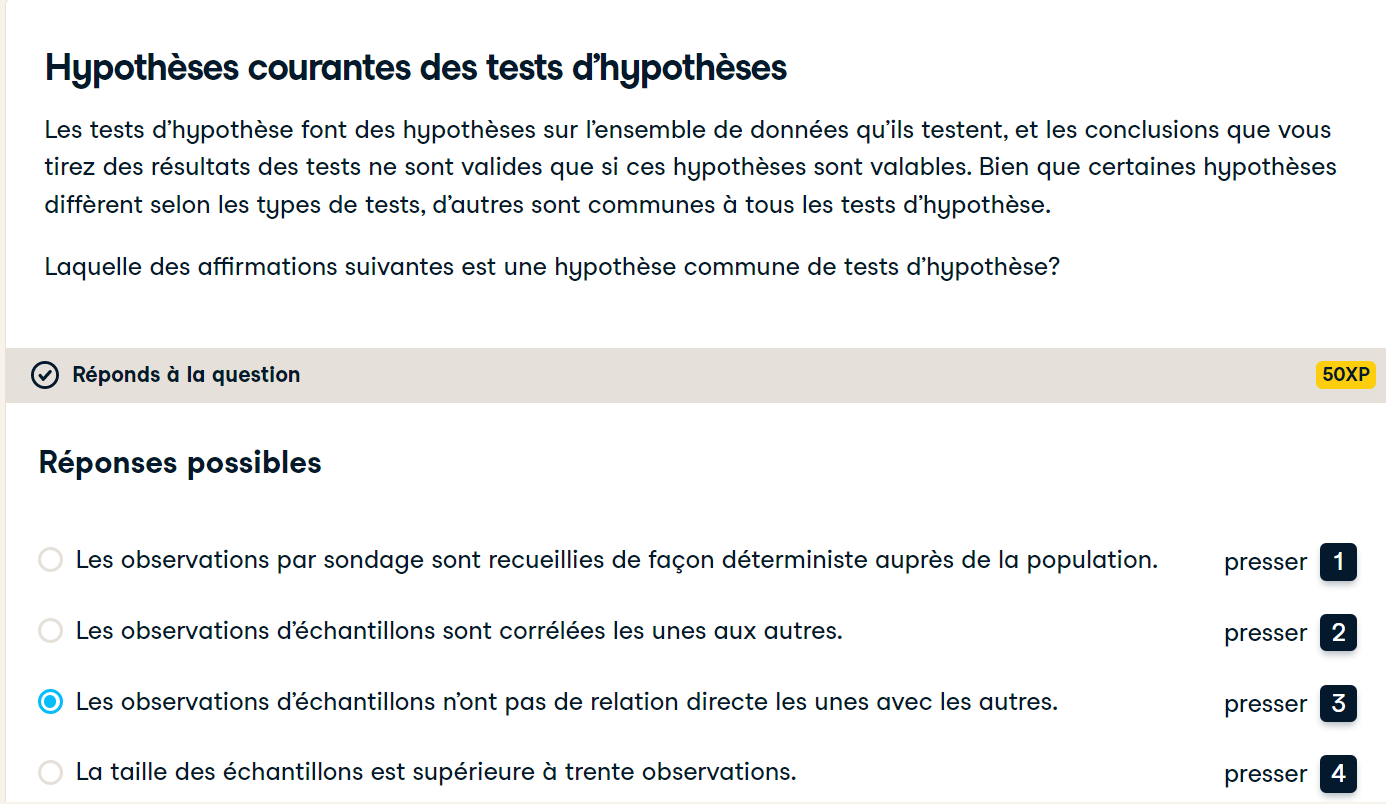


####**Tester la taille de l'échantillon**

+ *Pour pouvoir effectuer un test d'hypothèse et être sûr que le résultat est juste, un échantillon doit remplir trois conditions : il s'agit d'un échantillon aléatoire de la population, les observations sont indépendantes et il y a suffisamment d'observations. Parmi ces conditions, seule la dernière est facilement testable avec du code.*

+ La taille minimale de l'échantillon dépend du type de tests d'hypothèse que vous souhaitez effectuer. Vous allez maintenant tester quelques scénarios sur l'ensemble de données late_shipments.

***Notez que la méthode .all() de pandas peut être utilisée pour vérifier si tous les éléments sont vrais. Par exemple, étant donné un DataFrame df avec des entrées numériques, vous vérifiez si tous ses éléments sont inférieurs à 5, en utilisant (df < 5).all().***

*late_shipments est disponible, et pandas est chargé en tant que pd.*

####**Instructions** 
+ 1) 
  + Obtenez le nombre de chaque valeur dans la colonne freight_cost_group de late_shipments.

  + Insérez un nombre approprié pour vérifier si les comptes sont "assez grands" pour un test t à deux échantillons.


+ 2)

  + Obtenez le compte de chaque valeur dans la colonne late de late_shipments.

  + Insérez un nombre approprié pour vérifier si les comptes sont "assez grands" pour un test de proportion à un échantillon.

+ 3) 

  + Obtenez le nombre de chaque valeur dans la colonne groupe_coût_fret des expéditions tardives groupées par terme_inco_fournisseur.

  + Insérez un nombre approprié pour vérifier si les nombres sont "suffisamment importants" pour un test d'indépendance de type chi carré.

+ 4) 

  + Obtenez le nombre de chaque valeur dans la colonne shipment_mode de late_shipments.

  + Insérez un nombre approprié pour vérifier si les comptes sont suffisamment importants pour un test ANOVA.

In [273]:
# Count the freight_cost_group values
counts = late_shipments['freight_cost_groups'].value_counts()

# Print the result
print(counts)

expensive     531
reasonable    455
Name: freight_cost_groups, dtype: int64


In [274]:
# Inspect whether the counts are big enough
print((counts >= 30).all())

True


In [275]:
# Count the late values
counts = late_shipments['late'].value_counts()

# Print the result
print(counts)

No     939
Yes     61
Name: late, dtype: int64


In [276]:
# Inspect whether the counts are big enough
print((counts >= 10).all())

True


In [278]:
# Count the values of freight_cost_group grouped by vendor_inco_term
counts = late_shipments.groupby("vendor_inco_term")["freight_cost_groups"].value_counts()

# Print the result
print(counts)

vendor_inco_term  freight_cost_groups
CIP               reasonable              34
                  expensive               16
DDP               expensive               55
                  reasonable              45
DDU               reasonable               1
EXW               expensive              423
                  reasonable             302
FCA               reasonable              73
                  expensive               37
Name: freight_cost_groups, dtype: int64


In [279]:
# Inspect whether the counts are big enough
print((counts >= 5).all())

False


In [280]:
# Count the shipment_mode values
counts = late_shipments["shipment_mode"].value_counts()

# Print the result
print(counts)

Air            906
Ocean           88
Air Charter      6
Name: shipment_mode, dtype: int64


In [281]:
# Inspect whether the counts are big enough
print((counts >= 30).all())

False


###**Tests non paramétriques**

####**1. Tests non paramétriques**

+ Alors, que faisons-nous si les hypothèses pour les tests d’hypothèse que nous avons vus jusqu’à présent ne sont pas respectées?

####**2. Tests paramétriques**

+ Les tests que nous avons vus jusqu’à présent sont connus sous le nom de tests paramétriques. Les tests comme le test $z$, le test $t$ et l’ANOVA sont tous basés sur l’hypothèse que la population est normalement distribuée. 

+ Les tests paramétriques nécessitent également des tailles d’échantillon « suffisamment grandes » pour que le théorème central limite s’applique.

####**3. Données sur les votes républicains plus petits**

+ Étudions un cas où l’exigence de taille de l’échantillon n’est pas satisfaite avec un sous-ensemble des résultats du vote présidentiel américain pour les candidats républicains que nous avons examinés dans un chapitre précédent. 

+ Ici, repub_votes_small ne contient que cinq comtés échantillonnés au hasard à partir de l’ensemble de données plus vaste des déclarations au niveau des comtés de 2008 et 2012.

####**4. Résultats avec pingouin.ttest()**

+ Essayons d’effectuer un test t apparié sur ce petit échantillon. Rappelez-vous que nous avons besoin de 30 paires pour se sentir en confiance dans l’utilisation d’un test $t$, et cet échantillon n’en contient que cinq. 

+ Nous fixons un niveau de signification d’un pour cent et utilisons la méthode ttest de pingouin pour effectuer le test $t$ apparié à queue gauche. 

+ La petite valeur de $p$ indique que nous devrions rejeter l’hypothèse nulle, ce qui nous amène à soupçonner que l’élection de 2008 a eu un pourcentage plus faible de votes républicains que l’élection de 2012.

####**5. Tests non paramétriques**

+ Dans les situations où nous ne sommes pas sûrs de ces hypothèses, ou si nous sommes certains que les hypothèses ne sont pas respectées, nous pouvons utiliser des tests non paramétriques. 

+ Ils ne font pas les hypothèses de distribution normales ou les conditions de taille d’échantillon que nous avons vues dans la vidéo précédente. 

+ Il existe de nombreuses façons d’effectuer des tests sans ces hypothèses paramétriques. Dans ce chapitre, nous nous concentrerons sur celles relatives aux grades. Considérez la liste, $x$. 

+ La première valeur de $x$, un, est la plus petite valeur et la seconde, quinze, est la cinquième plus petite. Ces ordres du plus petit au plus grand sont connus sous le nom de rangs des éléments de $x$. Nous pouvons $y$ accéder avec la méthode rankdata de scipy-dot-stats.

####**6. Tests non paramétriques**

+ Utilisons maintenant un test non paramétrique pour voir quel type de résultats il donne. 

+ Rappelez-vous que les tests non paramétriques fonctionnent mieux que l’alternative paramétrique dans les situations où la taille de l’échantillon est petite ou où les données ne peuvent pas être supposées être distribuées normalement.

####**7. Tests non paramétriques**


+ Nous utiliserons **le test de rang signé Wilcoxon**, qui a été développé par Frank Wilcoxon en 1945 et a été l’une des premières procédures non paramétriques développées. Nous passerons en revue le fonctionnement interne du test avant de l’implémenter en utilisant une autre méthode pingouin.

####**8. Test de classement signé par Wilcoxon (étape 1)**

+ Le test de classement signé par Wilcoxon nous oblige à calculer les différences absolues dans les paires de données, puis à les classer. 

+ Tout d’abord, nous prenons les différences dans les valeurs appariées.

####**9. Test de classement signé par Wilcoxon (étape 2)**
+ Ensuite, nous prenons la valeur absolue des différences, en utilisant la méthode dot-abs, et les plaçons dans la colonne abs_diff.

####**10. Test de classement signé par Wilcoxon (étape 3)**
+ Ensuite, nous classons ces différences absolues à l’aide de la méthode **rankdata de scipy-dot-stats**.

####**11. Test de classement signé par Wilcoxon (étape 4)**

+ La dernière partie de notre calcul consiste à calculer une statistique de test appelée W. 

+ W utilise les signes de la colonne diff pour diviser les rangs en deux groupes: 

  + un pour les lignes avec des différences négatives et un pour les différences positives. 
  
  + T-moins est défini comme la somme des rangs avec des différences négatives, et T-plus est la somme des rangs avec des différences positives. 
  
+ Pour cet exemple, toutes les différences sont négatives, donc la valeur T-moins est la somme des cinq rangs, et T-plus est zéro. 


+ La statistique de test W est la plus petite de T-moins et T-plus, qui dans ce cas, est nulle. 

+ Nous pouvons calculer W, et sa valeur p correspondante, en utilisant une méthode pingouin au lieu d’un calcul manuel.

####**12. Mise en œuvre avec pingouin.wilcoxon()**

+ **La méthode dot-wilcoxon de pingouin** prend des arguments très similaires à la méthode dot-trest, sauf qu’elle n’a pas d’argument apparié. 

+ La fonction renvoie une valeur W de zéro - la même que notre calcul manuel! 


+ Cela correspond à une valeur de $p$ d’environ trois pour cent, qui est plus de dix fois plus grande que la valeur $p$ du test $t$, nous devrions donc nous sentir plus confiants avec ce résultat étant donné la petite taille de l’échantillon. 

+ Le test de Wilcoxon indique que nous n’avons pas de preuve que les pourcentages républicains de 2008 sont inférieurs aux pourcentages de 2012 en utilisant ce petit échantillon de cinq rangées.

####**13. Entraînons-nous!**
+ Obtenez votre Wilcoxon!

###**EXERCICE**

####**Quel test paramétrique ?**

+ *Quel test est un équivalent paramétrique du test du rang signé de Wilcoxon ?*

####**Répondez à la question**

####**Réponses possibles**

+ Test $z$ pour une différence de proportions

+ Test d'ajustement du khi-deux ou $\chi^2$

+ ***Test $t$ par paire***

+ ANOVA

####**Test du rang signé de Wilcoxon**

+ *Vous allez explorer la différence entre la proportion de votes au niveau du comté pour le candidat démocrate en 2012 et 2016 afin d'identifier si la différence est significative*.

+ *Le fichier sample_dem_data est disponible et comporte les colonnes dem_percent_12 et dem_percent_16 en plus des noms des états et des comtés. Les paquets suivants ont également été chargés : pingouin et pandas en tant que pd*.

####**Instructions**
+ 1)

  + Effectuez un test $t$ apparié sur les colonnes de pourcentage en utilisant une hypothèse alternative appropriée.

+ 2)

  + Effectuez un test de rang signé de Wilcoxon sur les mêmes colonnes.

In [282]:
# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data['dem_percent_12'], 
                                     y=sample_dem_data['dem_percent_16'],
                                     paired = True)
# Print paired t-test results
print(paired_test_results)

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  0.454202   

              BF10  power  
T-test  2.246e+111    1.0  


In [283]:
# Conduct a Wilcoxon test on dem_percent_12 and dem_percent_16
wilcoxon_test_results = pingouin.wilcoxon(x=sample_dem_data['dem_percent_12'], y=sample_dem_data['dem_percent_16'],
alternative = "two-sided")


# Print Wilcoxon test results
print(wilcoxon_test_results)

           W-val alternative         p-val       RBC      CLES
Wilcoxon  2401.0   two-sided  1.780396e-77  0.961661  0.644816


###**ANOVA non paramétrique et tests $t$ non appariés**

####**1. ANOVA non paramétrique et tests $t$ non appariés**

*Dans la vidéo précédente, nous avons exploré certaines techniques non paramétriques et comment elles se comparent à leurs homologues paramétriques. Nous continuerons sur ce thème ici en nous concentrant sur les alternatives non paramétriques aux tests d’échantillons numériques indépendants.*

####**2. Test de Wilcoxon-Mann-Whitney**

+ Nous pouvons éviter les hypothèses sur les données normalement distribuées en effectuant des tests d’hypothèse sur les rangs d’une entrée numérique. 

+ Le test de Wilcoxon-Mann-Whitney est, très grossièrement, un test $t$ sur des données classées. 

+ Ce test est similaire au test de Wilcoxon que nous avons vu dans la dernière vidéo, mais fonctionne plutôt sur des données non appariées.

####**3. Configuration de test Wilcoxon-Mann-Whitney**

+ Revenons à l’enquête StackOverflow et à la relation entre la rémunération convertie et l’âge auquel les répondants ont commencé à coder. 

+ Nous commençons par nous concentrer uniquement sur ces deux colonnes dans un nouveau DataFrame appelé age_vs_comp. 

+ Pour effectuer un test Wilcoxon-Mann-Whitney avec pingouin, nous devons d’abord convertir nos données du format long au format large. 

+ Ceci est accompli avec la méthode de pivot des pandas, qui, contrairement à pivot_table, ne s’agrège pas; Au lieu de cela, il retourne les valeurs brutes de chaque groupe sur les lignes. 

+ Nous avons maintenant nos données dans deux colonnes nommées adulte et enfant avec les valeurs correspondant aux entrées converted_comp pour chaque ligne. 

+ Une valeur adulte de NaN correspond à une entrée enfant et une valeur enfant de NaN correspond à une entrée adulte.

####**4. Essai de Wilcoxon-Mann-Whitney**


+ Fixons un niveau de signification d’un pour cent. 

+ Nous pouvons exécuter un test de Wilcoxon-Mann-Whitney en utilisant mwu de pingouin. 

+ Il accepte les arguments $x$ et $y$ correspondant aux deux colonnes de nombres que nous voulons comparer, dans ce cas, enfant et adulte. 

+ Alternative établit le type d’hypothèse alternative, dans ce cas, selon laquelle ceux qui codent d’abord en tant qu’enfants ont un revenu plus élevé que ceux qui codent d’abord à l’âge adulte, ce qui est un critère de droite. 

+ Ici, la valeur de p est indiquée comme étant d’environ dix à la dix-neuvième puissance négative, ce qui est nettement inférieur au niveau de signification.

####**5. Test de Kruskal-Wallis**
+ De la même manière que l’ANOVA étend les tests $t$ à plus de deux groupes, le test de Kruskal-Wallis étend le test de Wilcoxon-Mann-Whitney à plus de deux groupes. C’est-à-dire que le test de Kruskal-Wallis est une version non paramétrique de l’ANOVA. 

+ Nous utilisons la méthode kruskal de pingouin pour effectuer un test de Kruskal-Wallis afin de déterminer s’il existe une différence de converted_comp entre les groupes de satisfaction au travail. 

+ Contrairement au test de Wilcoxon-Mann-Whitney, nous n’avons pas besoin de faire pivoter nos données ici puisque la méthode kruskal fonctionne sur des données longues. 

+ Nous passons stack_overflow comme données, la variable dépendante, dv, comme converted_comp, et nous comparons entre les groupes de job_sat. 

+ Encore une fois, la valeur de p ici est très petite et plus petite que notre niveau de signification. 

+ Cela démontre qu’au moins un des totaux de rémunération moyens est différent des autres dans ces cinq groupes de satisfaction au travail.

####**6. Entraînons-nous!**
+ Vous y êtes presque! Rendez-vous sur les exercices pour essayer ces tests.

###**EXERCICE**

####**Wilcoxon-Mann-Whitney**

+ ***Une autre classe de tests d'hypothèse non paramétriques est appelée tests de somme de rangs. Les rangs sont les positions des valeurs numériques, de la plus petite à la plus grande. Pensez-y comme aux positions dans les épreuves de course à pied : celui qui a le temps le plus rapide (le plus petit) est classé au rang 1, le deuxième plus rapide au rang 2, et ainsi de suite.***

+ En calculant sur les rangs des données plutôt que sur les valeurs réelles, vous pouvez éviter de faire des hypothèses sur la distribution de la statistique de test. Il est plus robuste de la même manière qu'une médiane est plus robuste qu'une moyenne.

+ Un test commun basé sur les rangs est le test de Wilcoxon-Mann-Whitney, qui ressemble à un test $t$ non paramétrique.

+ *late_shipments est disponible, et les paquets suivants ont été chargés : pingouin et pandas comme pd.*

####**Instructions**

+ Sélectionnez weight_kilograms et late dans late_shipments, en attribuant le nom weight_vs_late.

+ Convertissez weight_vs_late du format long au format large, en mettant les colonnes à 'late'.

+ Exécutez un test de Wilcoxon-Mann-Whitney pour la différence de poids en kilogrammes lorsque l'envoi est en retard et à l'heure.

In [285]:
# Select the weight_kilograms and late columns
weight_vs_late = late_shipments[["weight_kilograms", "late"]]

# Convert weight_vs_late into wide format
weight_vs_late_wide = weight_vs_late.pivot(columns='late', 
                                           values='weight_kilograms')
weight_vs_late_wide.head()

late,No,Yes
0,NaN,1426.0
1,10.0,NaN
2,3723.0,NaN
3,7698.0,NaN
4,56.0,NaN


In [286]:
# Run a two-sided Wilcoxon-Mann-Whitney test on weight_kilograms vs. late
wmw_test = pingouin.mwu(x=weight_vs_late_wide['No'],
                        y=weight_vs_late_wide['Yes'],
                        alternative='two-sided')

# Print the test results
print(wmw_test)

       U-val alternative     p-val       RBC      CLES
MWU  19134.0   two-sided  0.000014  0.331902  0.334049


####**Kruskal-Wallis**

+ ***Rappelons que le test de Kruskal-Wallis est une version non paramétrique d'un test ANOVA, comparant les moyennes de plusieurs groupes.***

+ *late_shipments est disponible, et les paquets suivants ont été chargés : pingouin et pandas comme pd.*

####**Instructions**

+ Exécutez un test de Kruskal-Wallis sur le poids_kilogrammes entre les différents modes d'expédition dans late_shipments.

In [287]:
# Run a Kruskal-Wallis test on weight_kilograms vs. shipment_mode
kw_test = pingouin.kruskal(data=late_shipments, 
                           dv='weight_kilograms',
                           between='shipment_mode')

# Print the results
print(kw_test)

                Source  ddof1           H         p-unc
Kruskal  shipment_mode      2  125.096618  6.848799e-28
